### Financial Market Trend Analysis and Prediction For MAANG Companies

#### Project Abstract:
1. The main work as part of this project focuses on how well can traditional time series models like ARIMA work in the financial time series domain and how can some of the modern deep learning based algorithms like LSTMs be involved to perform the same task.
2. Another important aspect which this project deals with is to understand how does global news and gepolitical/events impact stock movements for tech stocks, particularly the MAANG companies.
3. This project performs sentiment analysis for the five tech stocks based on news articles on them and comes up with an additional feature to train an LSTM model for stock price forecasting.

#### Contributions:
1. <b>Aditya Krishnan</b>:<br><br>
Data extraction for the News text data using webscraping, worked on sentiment analysis of the news articles for the five tech stocks and coming up with an average sentiment score. Worked on ARIMA model building, performing model performance evaluation and comparison with the LSTM Model, documentation work.<br><br>
2. <b>Bharat Kathuria</b>:<br><br>
Worked on data storage and management in MongoDB Atlas, performing analysis and EDA of the tech stocks, and building an LSTM model for stock forecasting, documentation work  and performing sentiment analysis<br><br>
3. <b>Nikhil Devarasetti</b>:<br><br>
Project brainstorming and initial discussions to decide upon the workflow of tasks. Priliminary work and brief involvement in the data extraction using webscraping.

Load necessary libraries

In [591]:
import datetime
import os
import requests
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from datetime import date
from datetime import datetime
from dotenv import load_dotenv
from newspaper import Article

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.arima.model import ARIMA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

Load the environment variables

In [592]:
load_dotenv()

True

In [593]:
# Load your API key
connection_str = os.getenv("MONGO_CONNECTION_STR")

#### Connect to MongoDB Atlas
We will be using MongoDB Atlas which is a web based utlity of MongoDB to deal with storing and extraction of historical stock prices.

In [594]:
# Create a new client and connect to the server
client = MongoClient({connection_str}, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


#### Read the datasets located in GIT Repository.

In [595]:
aapl = pd.read_csv('https://raw.githubusercontent.com/aditya11997/DAM_final_project/master/data/AAPL.csv')
amzn = pd.read_csv('https://raw.githubusercontent.com/aditya11997/DAM_final_project/master/data/AMZN.csv')
googl = pd.read_csv('https://raw.githubusercontent.com/aditya11997/DAM_final_project/master/data/GOOG.csv')
meta = pd.read_csv('https://raw.githubusercontent.com/aditya11997/DAM_final_project/master/data/META.csv')
nflx = pd.read_csv('https://raw.githubusercontent.com/aditya11997/DAM_final_project/master/data/NFLX.csv')

Create a new database named 'stocks'

In [596]:
# create a new database
# Here, we are creating a new database named 'stocks'

db = client['stocks']

In [597]:
#Use the database
db = client.stocks

In [598]:
# list the names of all collections within the stock database
db.list_collection_names()

['amzn', 'nflx', 'aapl', 'meta', 'googl']

As we can see above, we have defined five empty collections for the five stocks

In [599]:
# add a new collection for each of the 4 stocks
aapl_collection = db["aapl"]
amzn_collection = db["amzn"]
googl_collection = db["googl"]
meta_collection = db["meta"]

In [600]:
nflx_collection = db["nflx"]

#### Now we will insert rows from the csv for each of the five stocks and insert it into the collections we defined above.

In [601]:
rows_as_dict = []
for index, row in aapl.iterrows():
    row_dict = dict(row)
    rows_as_dict.append(row_dict)

In [602]:
aapl_collection.insert_many(rows_as_dict)

InsertManyResult([ObjectId('6581c3aa5c062b53a4ae4927'), ObjectId('6581c3aa5c062b53a4ae4928'), ObjectId('6581c3aa5c062b53a4ae4929'), ObjectId('6581c3aa5c062b53a4ae492a'), ObjectId('6581c3aa5c062b53a4ae492b'), ObjectId('6581c3aa5c062b53a4ae492c'), ObjectId('6581c3aa5c062b53a4ae492d'), ObjectId('6581c3aa5c062b53a4ae492e'), ObjectId('6581c3aa5c062b53a4ae492f'), ObjectId('6581c3aa5c062b53a4ae4930'), ObjectId('6581c3aa5c062b53a4ae4931'), ObjectId('6581c3aa5c062b53a4ae4932'), ObjectId('6581c3aa5c062b53a4ae4933'), ObjectId('6581c3aa5c062b53a4ae4934'), ObjectId('6581c3aa5c062b53a4ae4935'), ObjectId('6581c3aa5c062b53a4ae4936'), ObjectId('6581c3aa5c062b53a4ae4937'), ObjectId('6581c3aa5c062b53a4ae4938'), ObjectId('6581c3aa5c062b53a4ae4939'), ObjectId('6581c3aa5c062b53a4ae493a'), ObjectId('6581c3aa5c062b53a4ae493b'), ObjectId('6581c3aa5c062b53a4ae493c'), ObjectId('6581c3aa5c062b53a4ae493d'), ObjectId('6581c3aa5c062b53a4ae493e'), ObjectId('6581c3aa5c062b53a4ae493f'), ObjectId('6581c3aa5c062b53a4ae49

In [603]:
rows_as_dict = []
for index, row in amzn.iterrows():
    row_dict = dict(row)
    rows_as_dict.append(row_dict)

In [604]:
amzn_collection.insert_many(rows_as_dict)

InsertManyResult([ObjectId('6581c3ae5c062b53a4ae52fd'), ObjectId('6581c3ae5c062b53a4ae52fe'), ObjectId('6581c3ae5c062b53a4ae52ff'), ObjectId('6581c3ae5c062b53a4ae5300'), ObjectId('6581c3ae5c062b53a4ae5301'), ObjectId('6581c3ae5c062b53a4ae5302'), ObjectId('6581c3ae5c062b53a4ae5303'), ObjectId('6581c3ae5c062b53a4ae5304'), ObjectId('6581c3ae5c062b53a4ae5305'), ObjectId('6581c3ae5c062b53a4ae5306'), ObjectId('6581c3ae5c062b53a4ae5307'), ObjectId('6581c3ae5c062b53a4ae5308'), ObjectId('6581c3ae5c062b53a4ae5309'), ObjectId('6581c3ae5c062b53a4ae530a'), ObjectId('6581c3ae5c062b53a4ae530b'), ObjectId('6581c3ae5c062b53a4ae530c'), ObjectId('6581c3ae5c062b53a4ae530d'), ObjectId('6581c3ae5c062b53a4ae530e'), ObjectId('6581c3ae5c062b53a4ae530f'), ObjectId('6581c3ae5c062b53a4ae5310'), ObjectId('6581c3ae5c062b53a4ae5311'), ObjectId('6581c3ae5c062b53a4ae5312'), ObjectId('6581c3ae5c062b53a4ae5313'), ObjectId('6581c3ae5c062b53a4ae5314'), ObjectId('6581c3ae5c062b53a4ae5315'), ObjectId('6581c3ae5c062b53a4ae53

In [605]:
rows_as_dict = []
for index, row in googl.iterrows():
    row_dict = dict(row)
    rows_as_dict.append(row_dict)

In [606]:
googl_collection.insert_many(rows_as_dict)

InsertManyResult([ObjectId('6581c3b25c062b53a4ae5cd3'), ObjectId('6581c3b25c062b53a4ae5cd4'), ObjectId('6581c3b25c062b53a4ae5cd5'), ObjectId('6581c3b25c062b53a4ae5cd6'), ObjectId('6581c3b25c062b53a4ae5cd7'), ObjectId('6581c3b25c062b53a4ae5cd8'), ObjectId('6581c3b25c062b53a4ae5cd9'), ObjectId('6581c3b25c062b53a4ae5cda'), ObjectId('6581c3b25c062b53a4ae5cdb'), ObjectId('6581c3b25c062b53a4ae5cdc'), ObjectId('6581c3b25c062b53a4ae5cdd'), ObjectId('6581c3b25c062b53a4ae5cde'), ObjectId('6581c3b25c062b53a4ae5cdf'), ObjectId('6581c3b25c062b53a4ae5ce0'), ObjectId('6581c3b25c062b53a4ae5ce1'), ObjectId('6581c3b25c062b53a4ae5ce2'), ObjectId('6581c3b25c062b53a4ae5ce3'), ObjectId('6581c3b25c062b53a4ae5ce4'), ObjectId('6581c3b25c062b53a4ae5ce5'), ObjectId('6581c3b25c062b53a4ae5ce6'), ObjectId('6581c3b25c062b53a4ae5ce7'), ObjectId('6581c3b25c062b53a4ae5ce8'), ObjectId('6581c3b25c062b53a4ae5ce9'), ObjectId('6581c3b25c062b53a4ae5cea'), ObjectId('6581c3b25c062b53a4ae5ceb'), ObjectId('6581c3b25c062b53a4ae5c

In [607]:
rows_as_dict = []
for index, row in meta.iterrows():
    row_dict = dict(row)
    rows_as_dict.append(row_dict)

In [608]:
meta_collection.insert_many(rows_as_dict)

InsertManyResult([ObjectId('6581c3b65c062b53a4ae66a9'), ObjectId('6581c3b65c062b53a4ae66aa'), ObjectId('6581c3b65c062b53a4ae66ab'), ObjectId('6581c3b65c062b53a4ae66ac'), ObjectId('6581c3b65c062b53a4ae66ad'), ObjectId('6581c3b65c062b53a4ae66ae'), ObjectId('6581c3b65c062b53a4ae66af'), ObjectId('6581c3b65c062b53a4ae66b0'), ObjectId('6581c3b65c062b53a4ae66b1'), ObjectId('6581c3b65c062b53a4ae66b2'), ObjectId('6581c3b65c062b53a4ae66b3'), ObjectId('6581c3b65c062b53a4ae66b4'), ObjectId('6581c3b65c062b53a4ae66b5'), ObjectId('6581c3b65c062b53a4ae66b6'), ObjectId('6581c3b65c062b53a4ae66b7'), ObjectId('6581c3b65c062b53a4ae66b8'), ObjectId('6581c3b65c062b53a4ae66b9'), ObjectId('6581c3b65c062b53a4ae66ba'), ObjectId('6581c3b65c062b53a4ae66bb'), ObjectId('6581c3b65c062b53a4ae66bc'), ObjectId('6581c3b65c062b53a4ae66bd'), ObjectId('6581c3b65c062b53a4ae66be'), ObjectId('6581c3b65c062b53a4ae66bf'), ObjectId('6581c3b65c062b53a4ae66c0'), ObjectId('6581c3b65c062b53a4ae66c1'), ObjectId('6581c3b65c062b53a4ae66

In [609]:
rows_as_dict = []
for index, row in nflx.iterrows():
    row_dict = dict(row)
    rows_as_dict.append(row_dict)

In [610]:
nflx_collection.insert_many(rows_as_dict)

InsertManyResult([ObjectId('6581c3ba5c062b53a4ae707f'), ObjectId('6581c3ba5c062b53a4ae7080'), ObjectId('6581c3ba5c062b53a4ae7081'), ObjectId('6581c3ba5c062b53a4ae7082'), ObjectId('6581c3ba5c062b53a4ae7083'), ObjectId('6581c3ba5c062b53a4ae7084'), ObjectId('6581c3ba5c062b53a4ae7085'), ObjectId('6581c3ba5c062b53a4ae7086'), ObjectId('6581c3ba5c062b53a4ae7087'), ObjectId('6581c3ba5c062b53a4ae7088'), ObjectId('6581c3ba5c062b53a4ae7089'), ObjectId('6581c3ba5c062b53a4ae708a'), ObjectId('6581c3ba5c062b53a4ae708b'), ObjectId('6581c3ba5c062b53a4ae708c'), ObjectId('6581c3ba5c062b53a4ae708d'), ObjectId('6581c3ba5c062b53a4ae708e'), ObjectId('6581c3ba5c062b53a4ae708f'), ObjectId('6581c3ba5c062b53a4ae7090'), ObjectId('6581c3ba5c062b53a4ae7091'), ObjectId('6581c3ba5c062b53a4ae7092'), ObjectId('6581c3ba5c062b53a4ae7093'), ObjectId('6581c3ba5c062b53a4ae7094'), ObjectId('6581c3ba5c062b53a4ae7095'), ObjectId('6581c3ba5c062b53a4ae7096'), ObjectId('6581c3ba5c062b53a4ae7097'), ObjectId('6581c3ba5c062b53a4ae70

Close the client object below

In [611]:
client.close()

#### Lets Connect to our MongoDB Atlas Database again and get our stock data

In [612]:
# Create a new client and connect to the server
client = MongoClient({connection_str},
                     server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [613]:
# get a list of databases on your local server
client.list_database_names()

['stocks', 'admin', 'local']

In [614]:
# connect to a specific mondoDB database
db = client.stocks

In [615]:
# list collections contained within a database
db.list_collection_names()

['amzn', 'nflx', 'aapl', 'meta', 'googl']

In [616]:
# select collection, aapl from the stocks database
aapl_collection = db["aapl"]

In [617]:
# save the output of the find() function to a variable
cursor = aapl_collection.find()

#### Now, we will retrieve each of the collections, use a cursor object and convert the entries into a pandas dataframe object.

In [618]:
entries = list(cursor)

# convert the content of the python list to a pandas dataframe
aapl = pd.DataFrame(entries)
aapl.head()

,_id,Date,Open,High,Low,Close,Adj Close,Volume
0,658126585c062b53a4adb596,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769093,560518000
1,658126585c062b53a4adb597,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557430,352965200
2,658126585c062b53a4adb598,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096228,594333600
3,658126585c062b53a4adb599,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001543,484156400
4,658126585c062b53a4adb59a,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044607,458707200


In [619]:
# select collection, amzn from the stocks database
amzn_collection = db["amzn"]

In [620]:
# save the output of the find() function to a variable
cursor = amzn_collection.find()

In [621]:
entries = list(cursor)

# convert the content of the python list to a pandas dataframe
amzn = pd.DataFrame(entries)
amzn.head()

,_id,Date,Open,High,Low,Close,Adj Close,Volume
0,658126825c062b53a4adbf6c,2013-01-02,12.8040,12.9050,12.6630,12.8655,12.8655,65420000
1,658126825c062b53a4adbf6d,2013-01-03,12.8635,13.0440,12.8185,12.9240,12.9240,55018000
2,658126825c062b53a4adbf6e,2013-01-04,12.8790,12.9900,12.8325,12.9575,12.9575,37484000
3,658126825c062b53a4adbf6f,2013-01-07,13.1485,13.4865,13.1335,13.4230,13.4230,98200000
4,658126825c062b53a4adbf70,2013-01-08,13.3535,13.4490,13.1785,13.3190,13.3190,60214000


In [622]:
# select collection, googl from the stocks database
googl_collection = db["googl"]

In [623]:
# save the output of the find() function to a variable
cursor = googl_collection.find()

In [624]:
entries = list(cursor)

# convert the content of the python list to a pandas dataframe
googl = pd.DataFrame(entries)
googl.head()

,_id,Date,Open,High,Low,Close,Adj Close,Volume
0,6581274a5c062b53a4adc942,2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,6581274a5c062b53a4adc943,2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,6581274a5c062b53a4adc944,2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,6581274a5c062b53a4adc945,2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,6581274a5c062b53a4adc946,2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [625]:
# select collection, meta from the stocks database
meta_collection = db["meta"]

In [626]:
# save the output of the find() function to a variable
cursor = meta_collection.find()

In [627]:
entries = list(cursor)

# convert the content of the python list to a pandas dataframe
meta = pd.DataFrame(entries)
meta.head()

,_id,Date,Open,High,Low,Close,Adj Close,Volume
0,658127625c062b53a4add318,2013-01-02,27.440001,28.180000,27.420000,28.000000,28.000000,69846400
1,658127625c062b53a4add319,2013-01-03,27.879999,28.469999,27.590000,27.770000,27.770000,63140600
2,658127625c062b53a4add31a,2013-01-04,28.010000,28.930000,27.830000,28.760000,28.760000,72715400
3,658127625c062b53a4add31b,2013-01-07,28.690001,29.790001,28.650000,29.420000,29.420000,83781800
4,658127625c062b53a4add31c,2013-01-08,29.510000,29.600000,28.860001,29.059999,29.059999,45871300


In [628]:
# select collection, nflx from the stocks database
nflx_collection = db["nflx"]

In [629]:
# save the output of the find() function to a variable
cursor = nflx_collection.find()

In [630]:
entries = list(cursor)

# convert the content of the python list to a pandas dataframe
nflx = pd.DataFrame(entries)
nflx.head()

,_id,Date,Open,High,Low,Close,Adj Close,Volume
0,658128965c062b53a4addcee,2013-01-02,13.601429,13.687143,12.955714,13.144286,13.144286,19431300
1,658128965c062b53a4addcef,2013-01-03,13.138571,13.988571,13.075714,13.798571,13.798571,27912500
2,658128965c062b53a4addcf0,2013-01-04,13.791429,13.958571,13.648571,13.711429,13.711429,17761100
3,658128965c062b53a4addcf1,2013-01-07,13.770000,14.535714,13.731429,14.171429,14.171429,45550400
4,658128965c062b53a4addcf2,2013-01-08,14.287143,14.427143,13.828571,13.880000,13.880000,24714900


In [631]:
client.close()

#### Now, Let's perform our eda work

In [632]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

##### AAPL

In [633]:
aapl['Date'] = pd.to_datetime(aapl['Date'])

In [634]:
aapl.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,10072,10072.000000,10072.000000,10072.000000,10072.000000,10072.000000,1.007200e+04
mean,2017-12-31 20:04:23.065925120,62.383387,63.087693,61.696664,62.416599,60.299983,1.713540e+08
min,2013-01-02 00:00:00,13.856071,14.271429,13.753571,13.947500,11.997527,3.519590e+07
25%,2015-07-02 00:00:00,26.969999,27.217501,26.705000,26.982500,24.536209,9.186560e+07
50%,2017-12-31 00:00:00,41.353750,41.872500,40.888750,41.313750,39.292040,1.301368e+08
75%,2020-07-02 00:00:00,91.279999,92.970001,90.910004,91.632500,89.725403,2.045420e+08
max,2022-12-30 00:00:00,182.630005,182.940002,179.119995,182.009995,179.953873,1.460852e+09
std,NaN,48.675783,49.314781,48.043886,48.702539,48.967619,1.250311e+08


The `aapl` DataFrame provides key insights into Apple Inc.'s stock performance:

- **Entries**: The dataset consists of 2,518 entries, uniformly distributed across all columns with no missing values.
- **Stock Prices**:
  - Average closing price is approximately \$62.42.
  - The prices show moderate to high variability, with standard deviations around \$48-49 for Open, High, Low, and Close prices.
- **Trading Volume**:
  - The average trading volume is around 171.35 million shares, indicating significant fluctuations.
- **Price Range**:
  - The dataset records a wide range in stock prices, from a minimum closing price of about \$13.95 to a maximum of \$182.01.

In [635]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10072 entries, 0 to 10071
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        10072 non-null  object        
 1   Date       10072 non-null  datetime64[ns]
 2   Open       10072 non-null  float64       
 3   High       10072 non-null  float64       
 4   Low        10072 non-null  float64       
 5   Close      10072 non-null  float64       
 6   Adj Close  10072 non-null  float64       
 7   Volume     10072 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 629.6+ KB


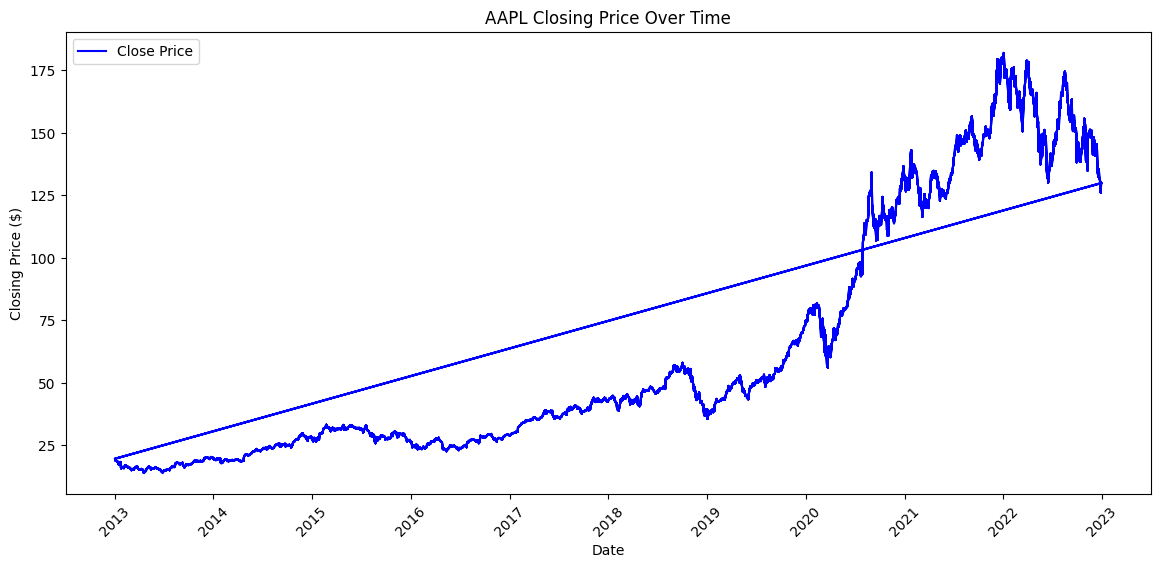

In [636]:
plt.figure(figsize=(14, 6))
plt.plot(aapl['Date'], aapl['Close'], label='Close Price', color='blue')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

The graph illustrates AAPL's stock closing price from 2013 to 2023:
- **X-Axis (Date)**: Displays a 10-year timeline with annual markings.
- **Y-Axis (Closing Price)**: Shows AAPL's closing price, ranging from under $25 to above $175.
- **Line Plot**: The blue line indicates the daily closing price, revealing the stock's trend.
- **Trends**:
  - **Initial Period (2013-2016)**: Price fluctuates within a narrow range, indicating consolidation.
  - **Growth Phase (2016-2021)**: Price ascends markedly, signifying a bullish growth phase.
  - **Recent Fluctuations (2021-2023)**: The price peaks and then exhibits a downward trend, suggesting a correction.


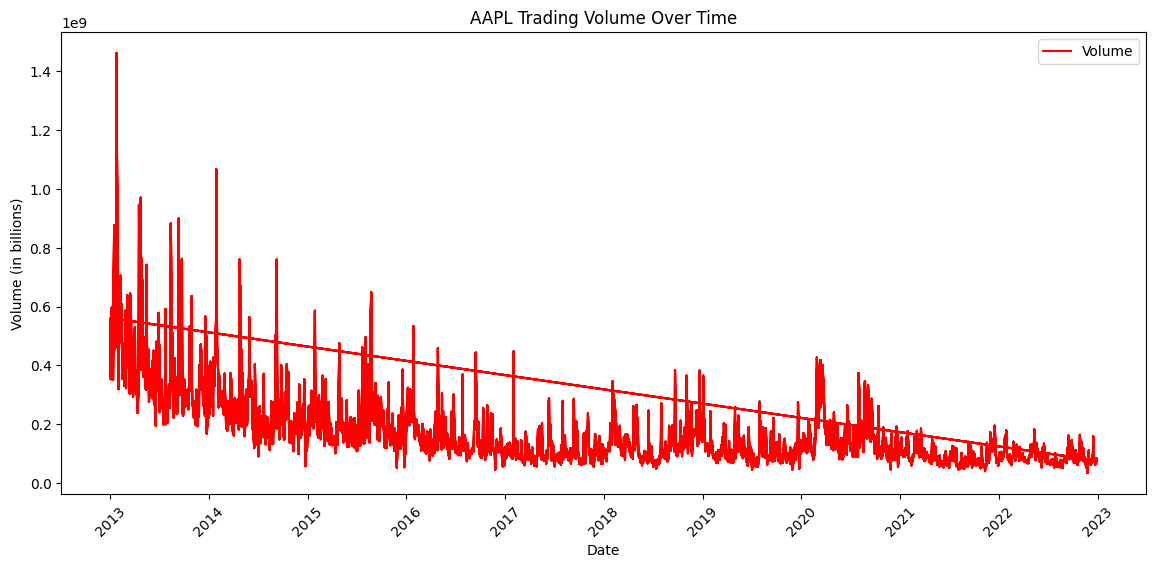

In [637]:
plt.figure(figsize=(14, 6))
plt.plot(aapl['Date'], aapl['Volume'], label='Volume', color='red')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in billions)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()


The graph tracks AAPL's daily trading volume over a decade:
- **X-Axis**: Dates from 2013 to 2023.
- **Y-Axis**: Volume, in billions of shares.
- **Observations**:
  - High initial trading volume with spikes.
  - A general decrease in volume spikes over time.
  - Less volatility in trading volume in recent years.


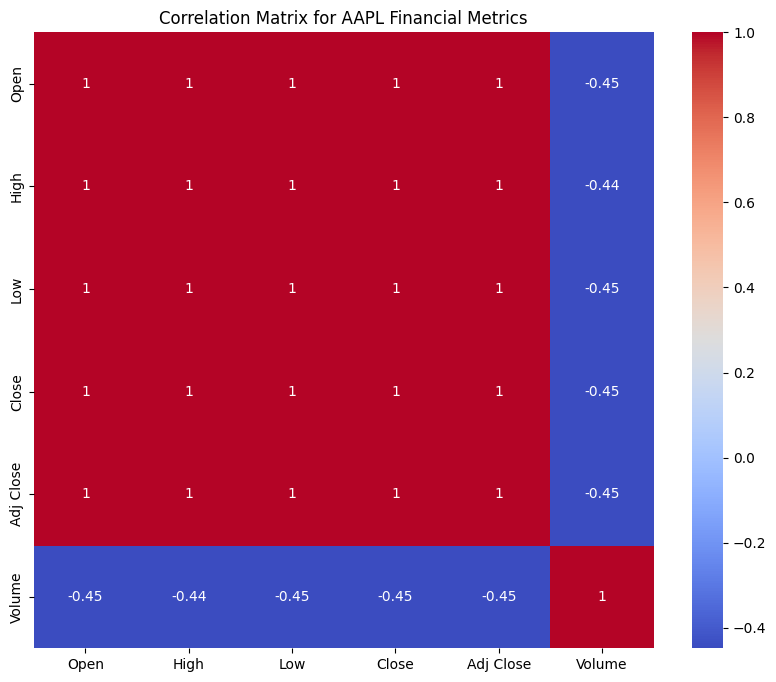

In [638]:
correlation_matrix = aapl[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for AAPL Financial Metrics')
plt.show()

The heatmap represents the correlation matrix for AAPL financial metrics:

- **Diagonal (1.0 Correlations)**: The diagonal shows a perfect correlation of 1.0 for each variable with itself.
- **Price Metrics (Open, High, Low, Close, Adj Close)**: These exhibit a perfect correlation with each other, as expected for stock prices within the same trading day.
- **Volume**: Displays a negative correlation with price metrics (around -0.45), indicating that as the volume increases, there is a tendency for the stock prices to decrease and vice versa.


##### GOOGL

In [639]:
googl['Date'] = pd.to_datetime(googl['Date'])

In [640]:
googl.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,10072,10072.000000,10072.000000,10072.000000,10072.000000,10072.000000,1.007200e+04
mean,2017-12-31 20:04:23.065925120,59.516451,60.113777,58.898768,59.518231,59.518231,4.283455e+07
min,2013-01-02 00:00:00,17.634134,17.651152,17.405405,17.589338,17.589338,9.312000e+06
25%,2015-07-02 00:00:00,30.325325,30.445499,30.101101,30.319571,30.319571,2.680800e+07
50%,2017-12-31 00:00:00,52.000749,52.578249,51.328749,51.987249,51.987249,3.439400e+07
75%,2020-07-02 00:00:00,73.775002,74.426003,73.004501,73.955498,73.955498,4.896200e+07
max,2022-12-30 00:00:00,151.250000,151.546494,148.899002,149.838501,149.838501,4.621933e+08
std,NaN,34.638870,35.043685,34.213481,34.627568,34.627568,2.699693e+07


The `googl` DataFrame summary statistics:

- **Entries**: There are 2,518 observations for each financial metric.
- **Mean Prices**: The average values for Open, High, Low, Close, and Adjusted Close are around \$59.52, suggesting the stock traded close to this price on average.
- **Volatility**: Standard deviations for the price metrics are around \$34.63, indicating moderate price fluctuation.
- **Trading Volume**: The average trading volume is about 42.83 million shares with significant variability (std of ~27 million).
- **Price Range**: The stock prices ranged from as low as \$17.59 to a high of \$149.84, showing the growth over the period.
- **Quartiles**:
  - The 25th percentile (Q1) suggests that 25% of the prices were below \$30.33.
  - The median (50th percentile) indicates that half of the prices were below \$51.99.
  - The 75th percentile (Q3) shows that 75% of the prices were below \$73.95.


In [641]:
googl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10072 entries, 0 to 10071
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        10072 non-null  object        
 1   Date       10072 non-null  datetime64[ns]
 2   Open       10072 non-null  float64       
 3   High       10072 non-null  float64       
 4   Low        10072 non-null  float64       
 5   Close      10072 non-null  float64       
 6   Adj Close  10072 non-null  float64       
 7   Volume     10072 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 629.6+ KB


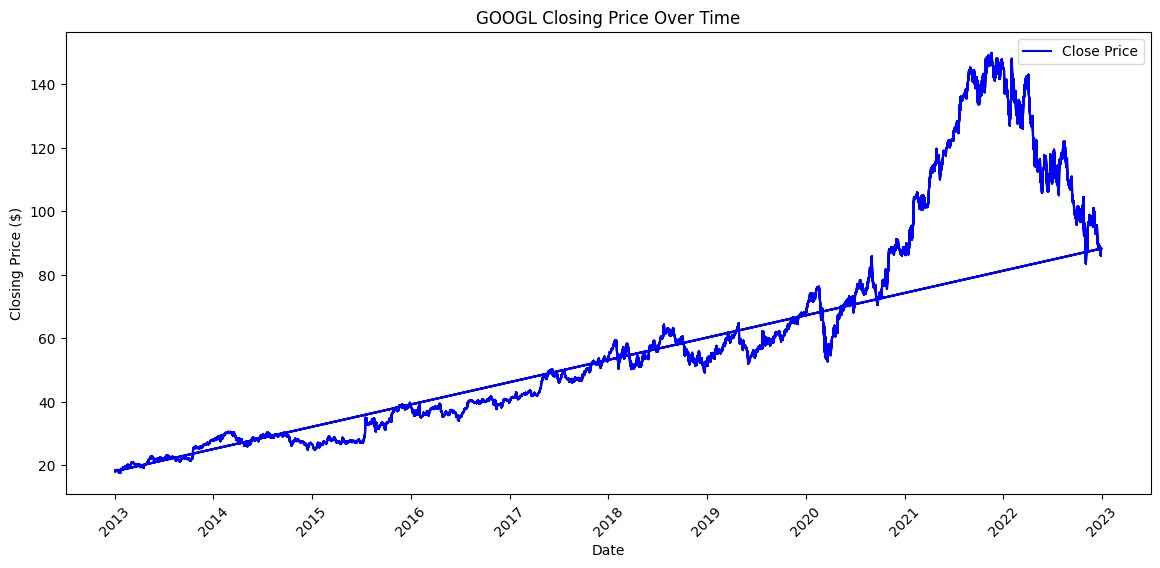

In [642]:
plt.figure(figsize=(14, 6))
plt.plot(googl['Date'], googl['Close'], label='Close Price', color='blue')
plt.title('GOOGL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

The graph shows GOOGL's closing price trend:
- Starts below $20 in 2013

- Gradually increases to peak around $140.
- Declines after the peak towards 2023.


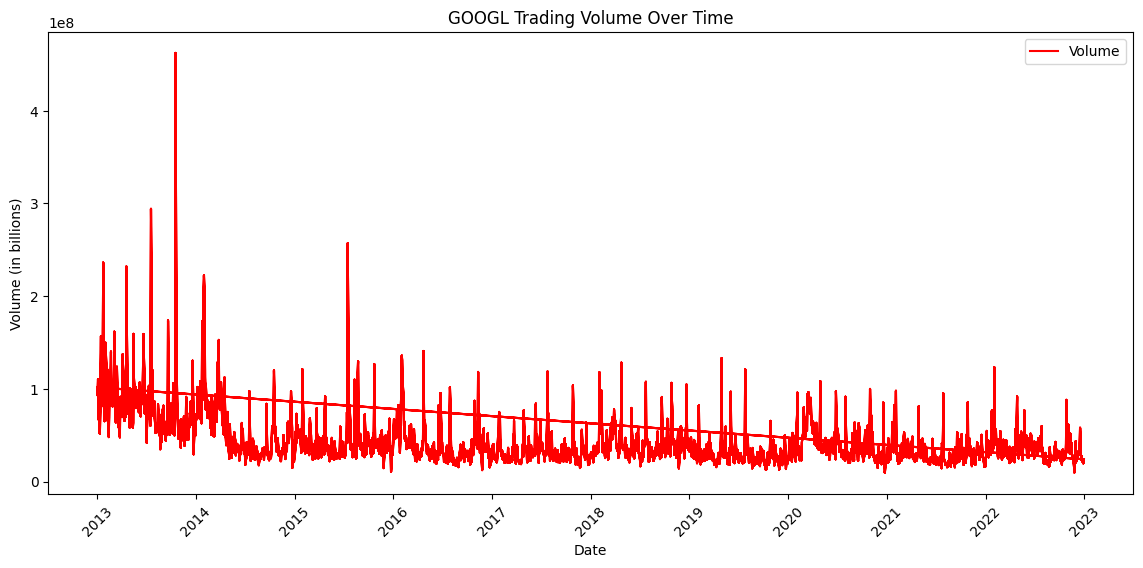

In [643]:
plt.figure(figsize=(14, 6))
plt.plot(googl['Date'], googl['Volume'], label='Volume', color='red')
plt.title('GOOGL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in billions)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

The graph illustrates GOOGL's trading volume:
- Several early spikes suggest days of high trading activity.
- Overall, the volume decreases, with fewer and lower spikes over time.


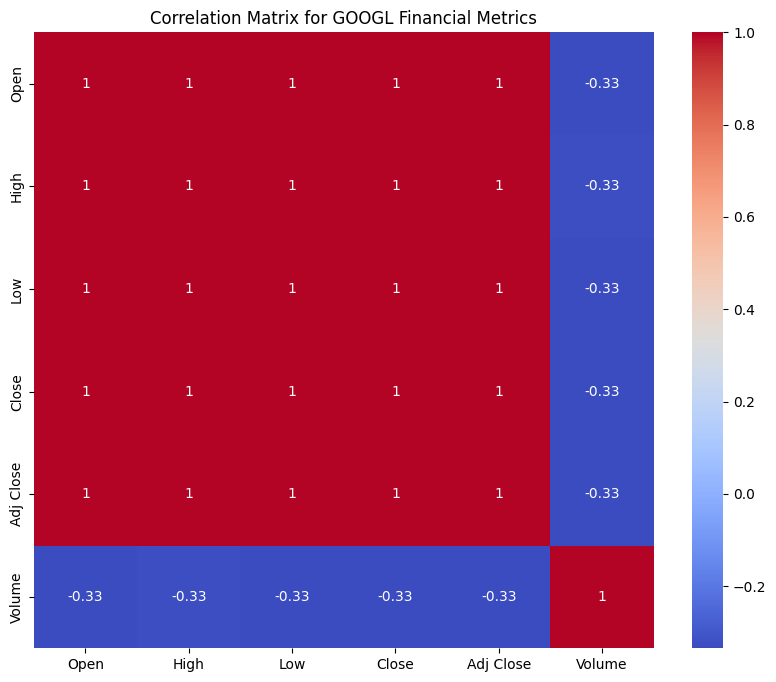

In [644]:
correlation_matrix = googl[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for GOOGL Financial Metrics')
plt.show()

The heatmap visualizes the correlation matrix for GOOGL financial metrics:
- **Diagonal (1.0 Correlations)**: Perfect correlation of each metric with itself.
- **High Correlation Among Prices**: Open, High, Low, Close, and Adj Close are perfectly correlated, as they move together during the trading day.
- **Volume Correlation**: Shows a mild negative correlation (around -0.33) with price metrics, suggesting that higher volume days are slightly associated with lower prices, or vice versa.


##### META

In [645]:
meta['Date'] = pd.to_datetime(meta['Date'])

In [646]:
meta.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,10072,10072.000000,10072.000000,10072.000000,10072.000000,10072.000000,1.007200e+04
mean,2017-12-31 20:04:23.065925120,155.543153,157.505195,153.590921,155.583022,155.583022,2.975921e+07
min,2013-01-02 00:00:00,22.990000,23.090000,22.670000,22.900000,22.900000,5.913100e+06
25%,2015-07-02 00:00:00,86.730003,87.669998,85.610001,86.669998,86.669998,1.598860e+07
50%,2017-12-31 00:00:00,151.669998,153.159997,149.520004,151.220002,151.220002,2.254390e+07
75%,2020-07-02 00:00:00,194.699997,197.389999,192.119995,194.470001,194.470001,3.460520e+07
max,2022-12-30 00:00:00,381.679993,384.329987,378.809998,382.179993,382.179993,3.654579e+08
std,NaN,83.870732,84.936084,82.833284,83.889214,83.889214,2.363372e+07


Summary statistics for meta stock's financial data:

- Data for 2,518 trading days.
- Mean closing price: \$155.58.
- Prices fluctuate with a standard deviation of ~\$83.90.
- Trading volume averages 29.76 million shares.
- Price ranges from a low of \$22.90 to a high of \$382.18.


In [647]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10072 entries, 0 to 10071
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        10072 non-null  object        
 1   Date       10072 non-null  datetime64[ns]
 2   Open       10072 non-null  float64       
 3   High       10072 non-null  float64       
 4   Low        10072 non-null  float64       
 5   Close      10072 non-null  float64       
 6   Adj Close  10072 non-null  float64       
 7   Volume     10072 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 629.6+ KB


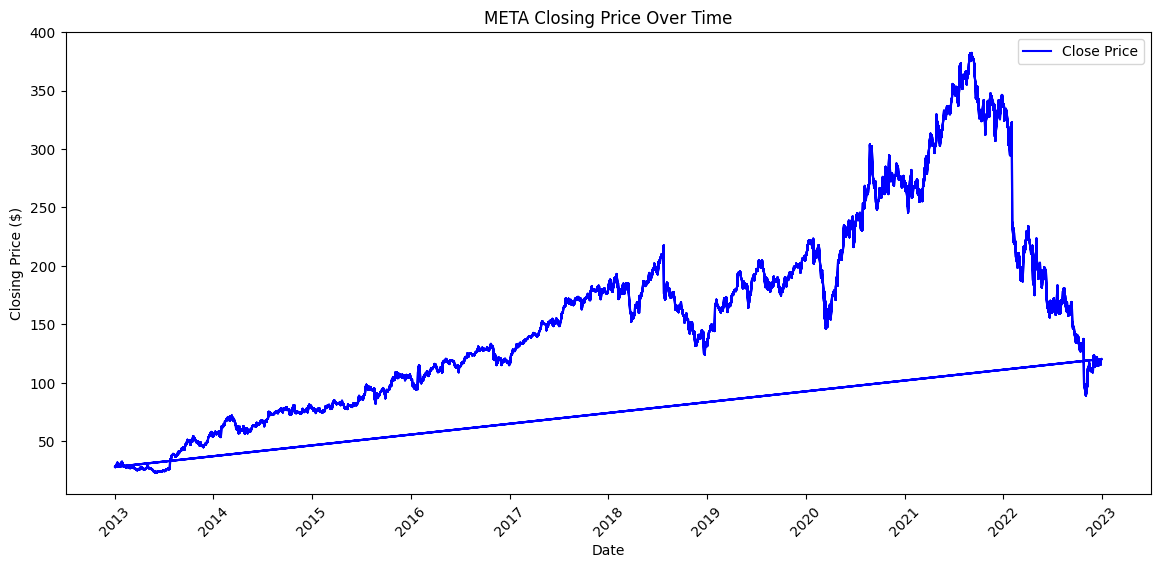

In [648]:
plt.figure(figsize=(14, 6))
plt.plot(meta['Date'], meta['Close'], label='Close Price', color='blue')
plt.title('META Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

The graph illustrates META's closing stock price from 2013 to 2023:
- The price shows a long-term increase, reaching a peak before a sharp decline.
- Initial years exhibit a steady ascent, while recent years show a significant drop.


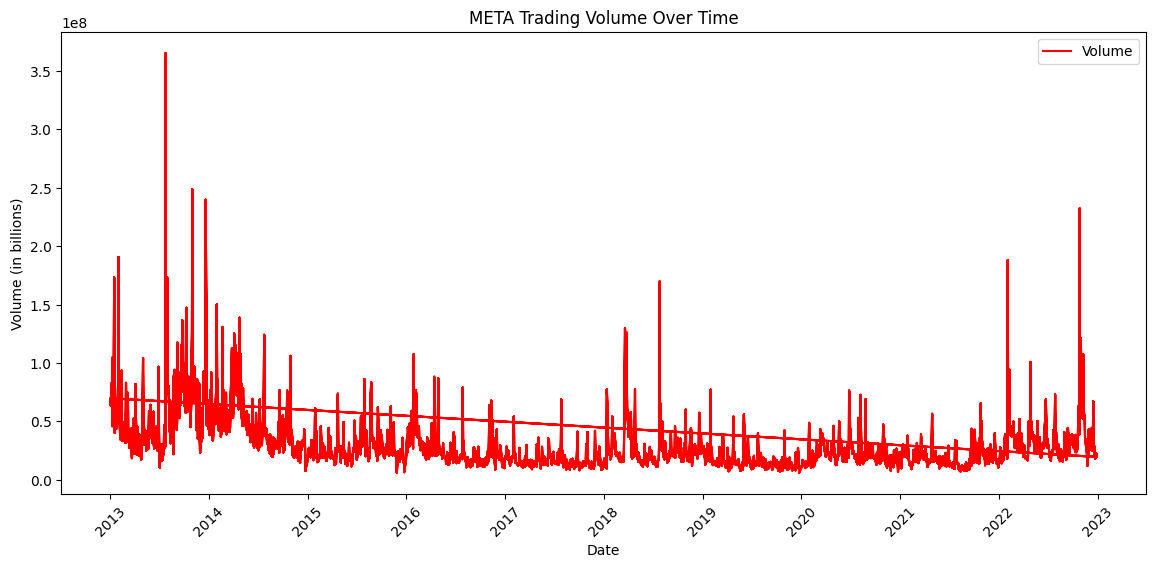

In [649]:
plt.figure(figsize=(14, 6))
plt.plot(meta['Date'], meta['Volume'], label='Volume', color='red')
plt.title('META Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in billions)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

The graph displays META's trading volume:
- Spikes in volume indicate days of high trading activity.
- There's a variation in trading volume, with some periods showing notably higher activity.


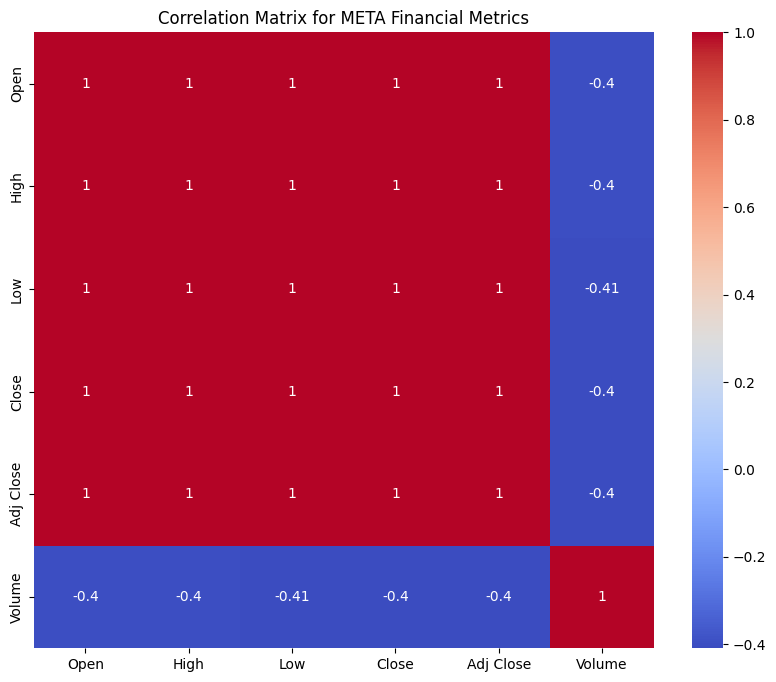

In [650]:
correlation_matrix = meta[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for META Financial Metrics')
plt.show()

The correlation matrix heatmap for META's financial metrics shows:

- **High Correlation** between 'Open', 'High', 'Low', 'Close', and 'Adj Close' prices, indicated by a value of 1, which means they move in perfect unison.
- **Volume Correlation**: There's a mild negative correlation (around -0.4) between 'Volume' and price metrics, suggesting that higher trading volume is slightly associated with lower prices, and vice versa.


##### NFLX

In [651]:
nflx['Date'] = pd.to_datetime(nflx['Date'])

In [652]:
nflx.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,10072,10072.000000,10072.000000,10072.000000,10072.000000,10072.000000,1.007200e+04
mean,2017-12-31 20:04:23.065925120,239.043344,242.743032,235.155357,239.053170,239.053170,1.259488e+07
min,2013-01-02 00:00:00,13.138571,13.687143,12.955714,13.144286,13.144286,1.144000e+06
25%,2015-07-02 00:00:00,89.214287,90.815712,88.169998,89.370003,89.370003,5.439600e+06
50%,2017-12-31 00:00:00,191.585000,194.405006,187.544999,190.705002,190.705002,9.141150e+06
75%,2020-07-02 00:00:00,361.959991,367.329987,356.619995,361.809998,361.809998,1.598070e+07
max,2022-12-30 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,1.914458e+08
std,NaN,174.322131,176.720382,171.673432,174.207573,174.207573,1.229479e+07


Summary of financial metrics for NFLX stock dataset:

- **Observations**: Data for 2,518 trading days.
- **Price Metrics**:
  - Mean closing price is \$239.05.
  - Prices have been volatile with a standard deviation of \$174.23.
- **Volume**:
  - Average trading volume is about 12.59 million shares.
  - Volume ranges from 1.14 million to 191.45 million shares.
- **Range**:
  - Stock prices vary from a minimum of \$13.14 to a maximum of \$691.69.
- **Quartiles**:
  - 25% of prices are below \$89.40 (Q1).
  - The median price is \$190.71 (Q2).
  - 75% of prices are below \$361.80 (Q3).


In [653]:
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10072 entries, 0 to 10071
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        10072 non-null  object        
 1   Date       10072 non-null  datetime64[ns]
 2   Open       10072 non-null  float64       
 3   High       10072 non-null  float64       
 4   Low        10072 non-null  float64       
 5   Close      10072 non-null  float64       
 6   Adj Close  10072 non-null  float64       
 7   Volume     10072 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 629.6+ KB


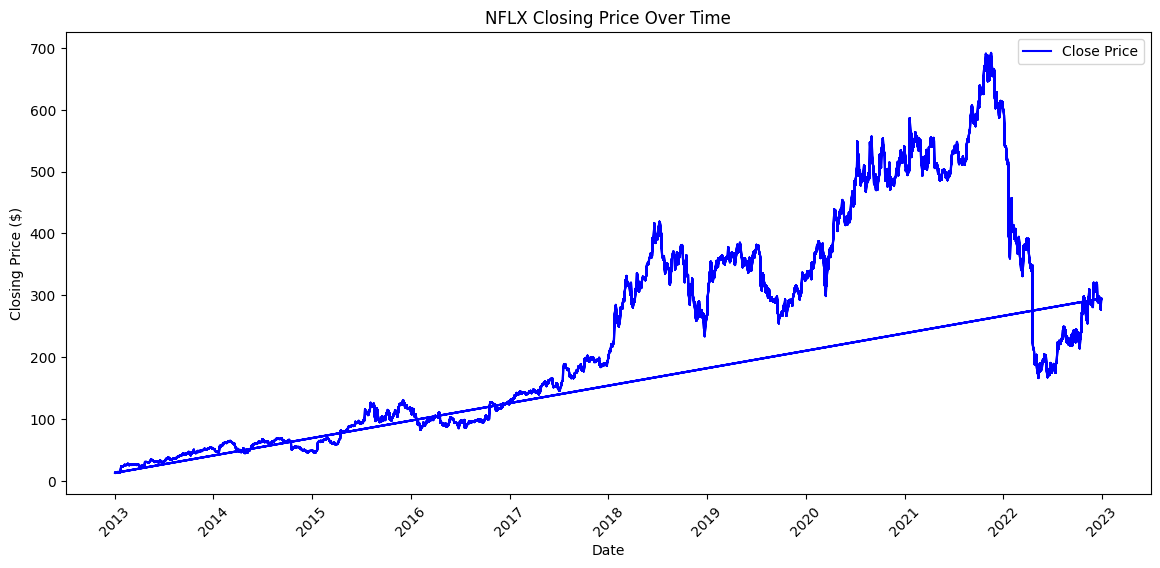

In [654]:
plt.figure(figsize=(14, 6))
plt.plot(nflx['Date'], nflx['Close'], label='Close Price', color='blue')
plt.title('NFLX Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

The graph depicts NFLX's closing price trend:
- An overall upward trend is seen initially, with the price reaching its peak in recent years.
- A sharp decline follows the peak, indicating a significant drop in the stock's closing price.


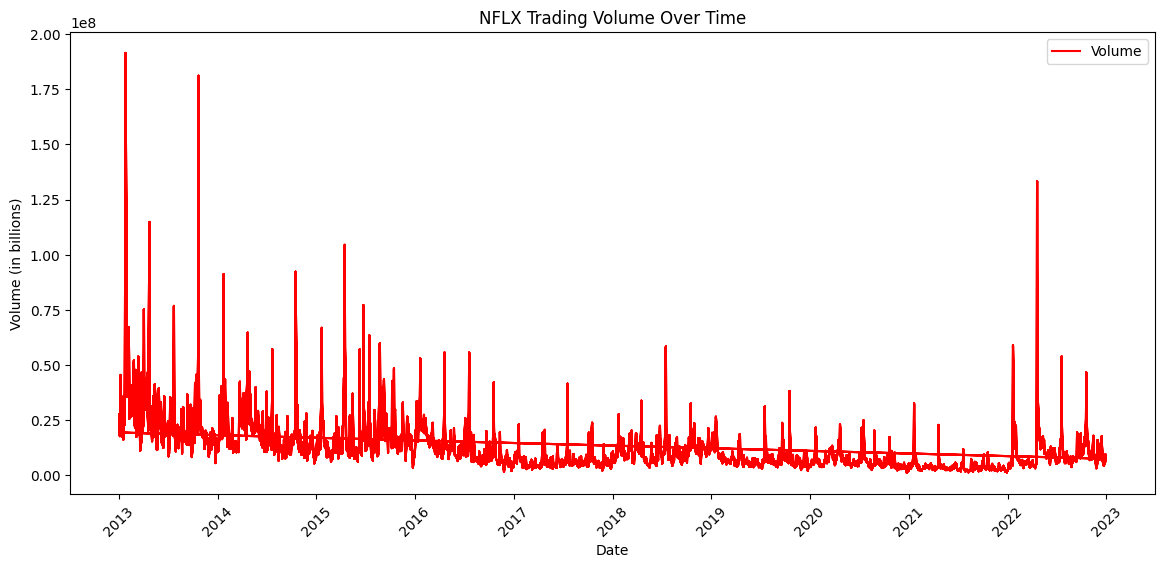

In [655]:
plt.figure(figsize=(14, 6))
plt.plot(nflx['Date'], nflx['Volume'], label='Volume', color='red')
plt.title('NFLX Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in billions)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

The graph shows NFLX's trading volume from 2013 to 2023:
- There are several spikes, indicating days of particularly high trading activity.
- The trading volume varies significantly over the period, with some of the highest spikes occurring in the later years.

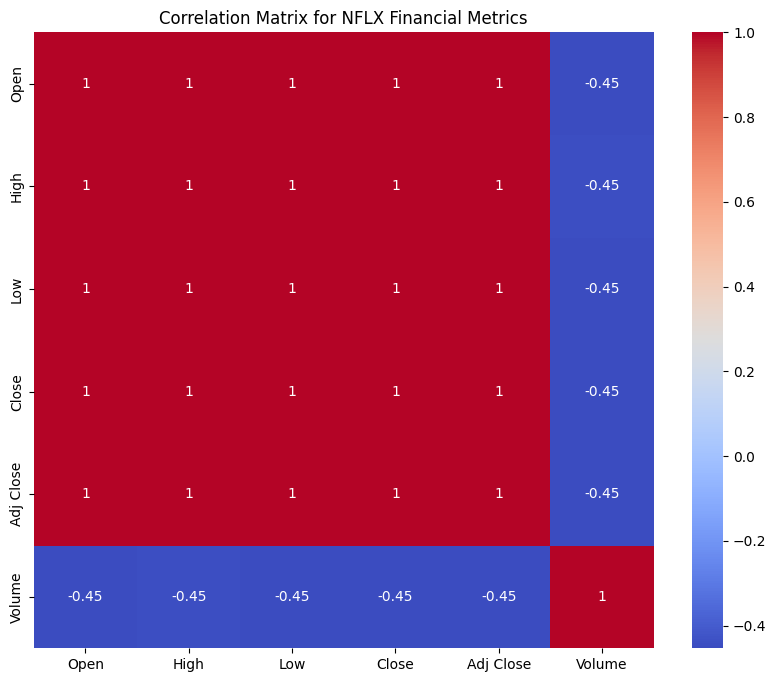

In [656]:
correlation_matrix = nflx[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for NFLX Financial Metrics')
plt.show()

The correlation matrix heatmap for NFLX's financial metrics indicates:
- Strong positive correlation among 'Open', 'High', 'Low', 'Close', and 'Adj Close' (values close to 1), as expected for daily stock prices.
- A moderate negative correlation (around -0.4) between 'Volume' and price metrics, suggesting that higher trading volume may be associated with lower prices, and vice versa.


##### AMZN

In [657]:
amzn['Date'] = pd.to_datetime(amzn['Date'])

In [658]:
amzn.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,10072,10072.000000,10072.000000,10072.000000,10072.000000,10072.000000,1.007200e+04
mean,2017-12-31 20:04:23.065925120,73.823536,74.661898,72.881356,73.780049,73.780049,8.025620e+07
min,2013-01-02 00:00:00,12.447000,12.646500,12.287500,12.411500,12.411500,1.762600e+07
25%,2015-07-02 00:00:00,21.967501,22.236000,21.778999,21.969500,21.969500,5.363600e+07
50%,2017-12-31 00:00:00,59.936500,60.270750,59.420500,59.735750,59.735750,6.862200e+07
75%,2020-07-02 00:00:00,107.970001,110.155998,106.294502,107.783501,107.783501,9.300200e+07
max,2022-12-30 00:00:00,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08
std,NaN,53.337710,53.990719,52.606297,53.281620,53.281620,4.229670e+07


 #### Stock Data Summary (2518 Trading Days)

- **Prices (Open, High, Low, Close, Adj Close):**
  - Average around 73-74.
  - Maximum values near 188.
  - Minimum values around 12.

- **Volume:**
  - Average: ~80.26 million.
  - Standard Deviation: ~42.30 million.
  - Range: 17.63 million to 477.12 million.

**Key Stats:**
- Mean prices and volume indicate average trading conditions.
- Standard Deviation and range values highlight significant fluctuations.


In [659]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10072 entries, 0 to 10071
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   _id        10072 non-null  object        
 1   Date       10072 non-null  datetime64[ns]
 2   Open       10072 non-null  float64       
 3   High       10072 non-null  float64       
 4   Low        10072 non-null  float64       
 5   Close      10072 non-null  float64       
 6   Adj Close  10072 non-null  float64       
 7   Volume     10072 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 629.6+ KB


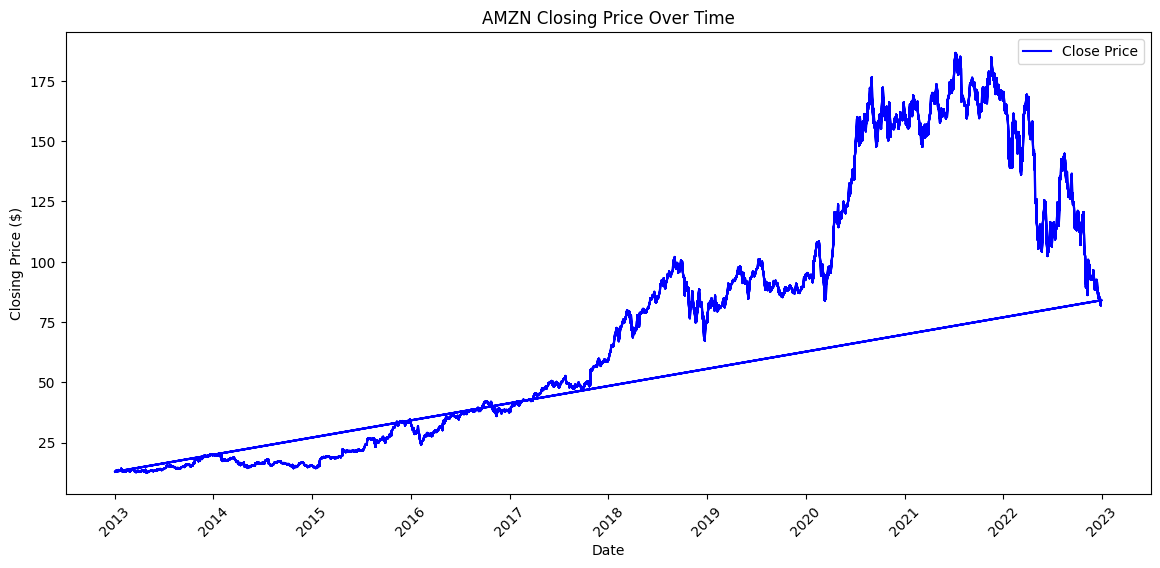

In [660]:
plt.figure(figsize=(14, 6))
plt.plot(amzn['Date'], amzn['Close'], label='Close Price', color='blue')
plt.title('AMZN Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()


#### Amazon (AMZN) Stock Closing Price Trend

The graph presents the closing price of Amazon's stock (AMZN) from around 2013 through early 2023. We observe the following:

- **Overall Trend**: A strong upward trend for several years, suggesting substantial growth over time.
- **Volatility**: Notable fluctuations and volatility are visible, particularly in the later years.
- **Peaks and Troughs**: The stock reaches its peak before 2022 and then shows a downturn.
- **Recent Performance**: In the most recent period, the stock price appears to be declining.

The visualization is a straightforward line chart with the x-axis representing time and the y-axis representing the stock's closing price in USD.


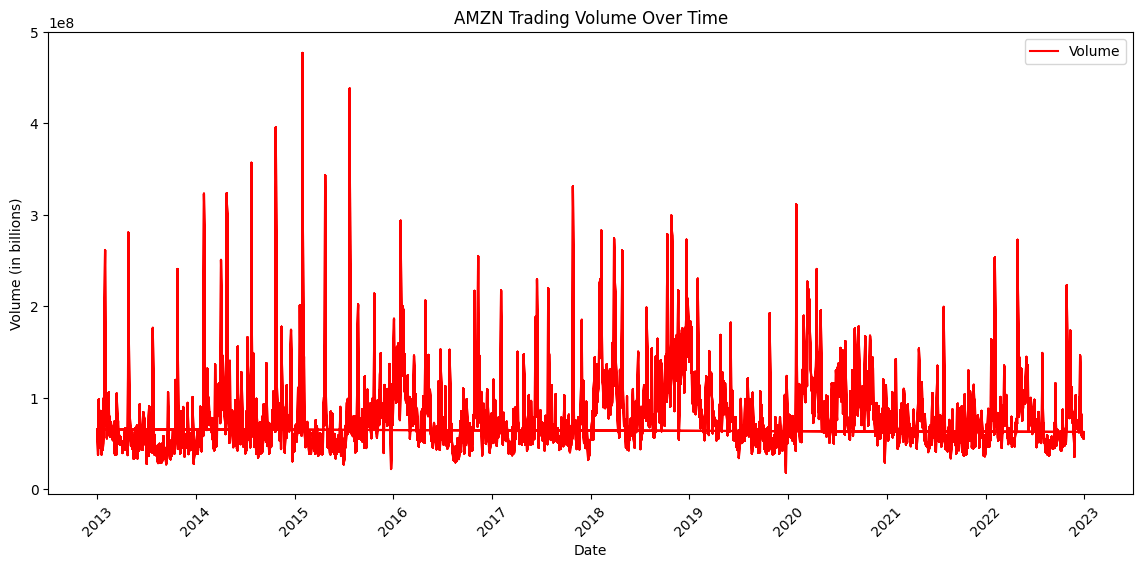

In [661]:
plt.figure(figsize=(14, 6))
plt.plot(amzn['Date'], amzn['Volume'], label='Volume', color='red')
plt.title('AMZN Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in billions)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Quick Overview: AMZN Trading Volume

- **Visualization**: Line chart of Amazon's daily trading volume from 2013 to 2023.
- **Observations**: High variability with occasional spikes, reflecting periods of intense trading activity.
- **Volume Range**: Fluctuates, with some days reaching over 4 billion shares traded.


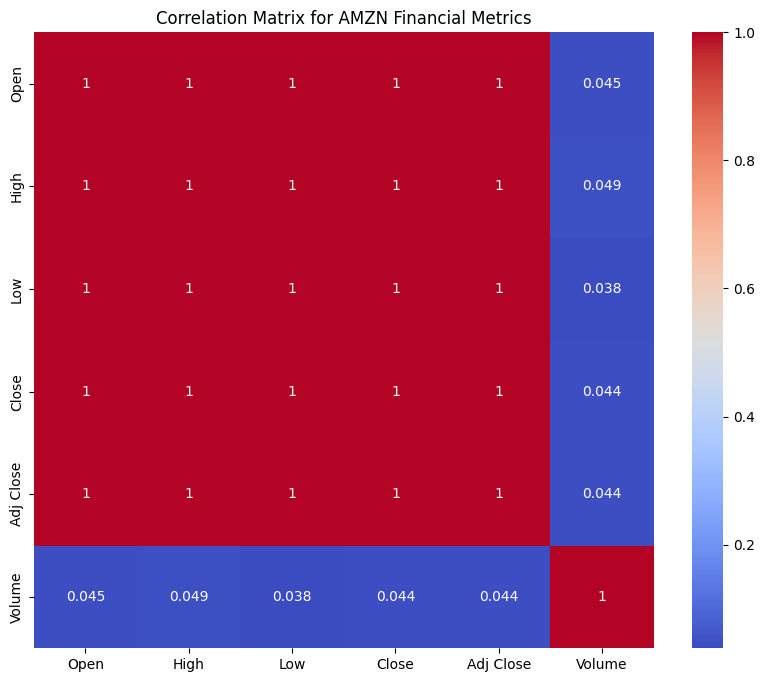

In [662]:
correlation_matrix = amzn[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for AMZN Financial Metrics')
plt.show()

#### AMZN Correlation Matrix Summary

The correlation matrix visualizes the relationship between AMZN's daily trading metrics:

- **Price Metrics (Open, High, Low, Close, Adj Close)**: Show perfect correlation (1.0) with each other.
- **Volume**: Has a very low correlation with price metrics (around 0.04), indicating little to no linear relationship.

This indicates that AMZN's trading volume does not consistently move with its stock price.


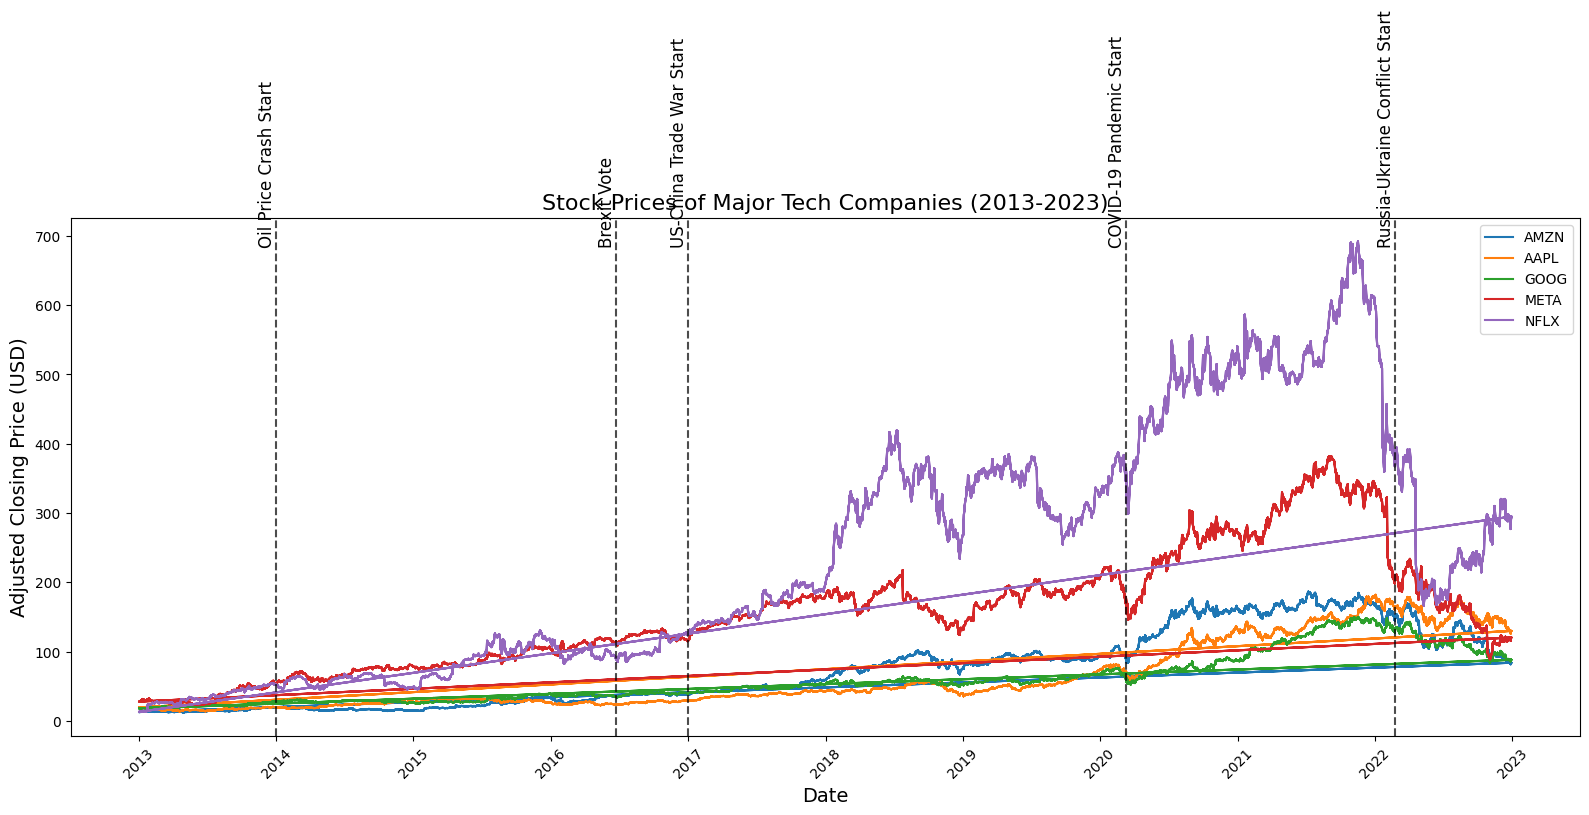

In [878]:
# Define the events with their approximate dates
events = {
    'Oil Price Crash Start': '2014-01-01',
    'Brexit Vote': '2016-06-23',
    'US-China Trade War Start': '2017-01-01',
    'COVID-19 Pandemic Start': '2020-03-11',
    'Russia-Ukraine Conflict Start': '2022-02-24',
}

# Convert event dates to datetime
event_dates = {event: pd.to_datetime(date) for event, date in events.items()}

# Plotting function using Matplotlib
def plot_stock_prices(stock_data, events):
    plt.figure(figsize=(16, 8))
    
    # Plot each stock's data
    for stock, df in stock_data.items():
        plt.plot(df['Date'], df['Close'], label=stock)
    
    # Annotate significant events
    for event, date in events.items():
        plt.axvline(x=date, color='black', linestyle='--', alpha=0.7)
        plt.text(date, plt.gca().get_ylim()[1]*0.95, event, rotation=90, fontsize=12, ha='right')
    
    # Formatting the plot
    plt.title('Stock Prices of Major Tech Companies (2013-2023)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Adjusted Closing Price (USD)', fontsize=14)
    plt.legend()
    plt.tight_layout()
    
    # Set x-axis major ticks to yearly interval and format them to show only the year
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    plt.show()

# Example dataframes for each stock, replace these with your actual dataframes
amzn['Date'] = pd.to_datetime(amzn['Date'])
aapl['Date'] = pd.to_datetime(aapl['Date'])
googl['Date'] = pd.to_datetime(googl['Date'])
meta['Date'] = pd.to_datetime(meta['Date'])
nflx['Date'] = pd.to_datetime(nflx['Date'])

# Create a dictionary to hold your dataframes, keyed by the stock symbol
stock_data = {
    'AMZN': amzn,
    'AAPL': aapl,
    'GOOG': googl,
    'META': meta,
    'NFLX': nflx,
}

# Now call the plot_stock_prices function with your stock data and the event dates
plot_stock_prices(stock_data, event_dates)


## Summary of the Graph:

- **Oil Price Crash (2014)**: No significant impact on the tech stock prices, as these companies are not directly affected by oil prices.

- **Brexit Vote (June 2016)**: Minor fluctuations in the stock prices around the time of the Brexit vote, with quick recovery, indicating resilience to political changes in Europe.

- **US-China Trade War (2017)**: The beginning of the trade war seemed to have little to no negative impact on the tech stock prices, possibly due to strong market positions and diverse global operations.

- **COVID-19 Pandemic (March 2020)**: A sharp decline in stock prices as markets reacted to the global lockdowns and economic uncertainty, followed by a swift recovery that underscores the tech sector's robustness and adaptability.

- **Russia-Ukraine Conflict (February 2022)**: The conflict led to increased market volatility; however, the tech stocks show a varied response, with some declining while others remaining relatively stable.


##### Now, our next task is to perform Sentiment Analysis on the text data we extracted using the `data_extraction_webscraping.ipynb` notebook and combining sentiments with stock data. The idea here is to evaluate if sentiments about a stock have some kind of correlation with its price movement.

In [664]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')
import pandas as pd
import seaborn as sns
import spacy
from datetime import datetime
from nltk.corpus import stopwords
from nltk import tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Define a function to clean the text corpus

In [665]:
def clean_data(news_sentiments: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and preprocess the news data.

    This function takes a DataFrame 'news_sentiments' as input and performs the following data cleaning steps:
    
    1. Remove the publisher's name or source information from the beginning of the news Content if it exists.
    2. Replace newline characters with spaces to ensure proper text formatting.
    3. Remove backslashes ('\') as they are not needed in the text.
    4. Remove asterisks ('*') which may be used for formatting or emphasis.
    5. Remove double hyphens followed by a space ('-- ') which might be formatting artifacts.
    6. Remove single hyphens ('-') that do not provide meaningful information.
    7. Remove en dashes ('–') which may not be relevant in the text.
    8. Remove specific stock market symbols such as "(NYSE: )", "(NS: )", and "(NASDAQ: )" which are often not needed in text analysis.

    Parameters:
    - news_sentiments (DataFrame): A DataFrame containing news data with 'Source' and 'Content' columns.

    Returns:
    - Cleaned DataFrame: A DataFrame with the same structure as 'news_sentiments' after cleaning.

    """
    for i in range(len(news_sentiments)):
        # Check if 'Source' text is in 'Content'
        if news_sentiments['Source'][i] in news_sentiments['Content'][i]:
            # Remove 'Source' text from 'Content' and strip leading whitespace
            news_sentiments['Content'][i] = news_sentiments['Content'][i].replace(news_sentiments['Source'][i], '').lstrip()
        
        # Replace newline characters with spaces
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace('\n', ' ')
        
        # Remove backslashes
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace("\\", '')
        
        # Remove asterisks
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace("*", '')
        
        # Remove double hyphens followed by a space
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace("-- ", '')
        
        # Remove single hyphens
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace("-", '')
        
        # Remove en dashes
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace("–", '')
        
        # Remove specific stock market symbols
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace("(NYSE: )", '')
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace("(NS: )", '')
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace("©2021 Bloomberg L.P.)" , '' )
        news_sentiments['Content'][i] = news_sentiments['Content'][i].replace("(NASDAQ: )", '')
    
    return news_sentiments

Now, we'll try to shorten the content of the news articles to keep it relevant to sentences that mention the stock names.

In [666]:
def reduce_content_by_stock_name(dataframe: pd.DataFrame,
                                 stock_name: str,
                                 input_column: str,
                                 output_column: str) -> pd.DataFrame:
    """
    Reduce the content of news articles by selecting sentences that mention a specific stock name.

    Args:
    dataframe (pd.DataFrame): The DataFrame containing the news articles.
    stock_name (str): The stock name to identify relevant sentences.
    input_column (str): The name of the input column containing the news article content.
    output_column (str): The name of the output column to store the reduced content.

    Returns:
    pd.DataFrame: The DataFrame with the 'output_column' containing reduced news article content.
    """
    dataframe[output_column] = dataframe[input_column]  # Create a new column for reduced news article content
    for i in range(len(dataframe)):
        selected_sentences = []
        sentences = tokenize.sent_tokenize(dataframe[input_column][i])  # Tokenize the content into sentences
        for sentence in sentences:
            if stock_name in sentence:
                selected_sentences.append(sentence)  # Select sentences containing the stock name
        dataframe[output_column][i] = ' '.join(selected_sentences)  # Join selected sentences into reduced content
    return dataframe

In [667]:
def analyze_stock_news_sentiment(news_data: pd.DataFrame,
                                 stock_keywords: [str, list]) -> (pd.DataFrame,
                                                                  pd.DataFrame):
    """
    Analyzes the sentiment of news articles for specified stock(s).

    This function takes a DataFrame containing news articles and a stock keyword (or list of keywords).
    It filters sentences in the articles that are relevant to the specified stock(s), then performs sentiment analysis
    on this filtered content using VADER and TextBlob. The function returns the average sentiment scores by date
    and a combined DataFrame with aggregated headlines, content, and calculated sentiment scores.

    Parameters:
    news_data (pd.DataFrame): A DataFrame where each row represents a news article. Must contain the columns 'content', 'Headlines', and 'Date'.
    stock_keywords (str or list): A string or a list of strings representing the stock name(s) to filter the news content.

    Returns:
    tuple: A tuple containing two DataFrames:
           1. DataFrame with average sentiment scores by date.
           2. Combined DataFrame with aggregated headlines, content, and calculated sentiment scores.
    """

    nlp = spacy.load("en_core_web_md")
    sid = SentimentIntensityAnalyzer()

    # Check if stock_keywords is a string or list and convert to list if necessary
    if isinstance(stock_keywords, str):
        stock_keywords = [stock_keywords]

    # Tokenizing and filtering relevant sentences for the given stock(s)
    def filter_stock_sentences(text):
        return ' '.join([sent.text for sent in nlp(text).sents if any(stock_keyword in sent.text for stock_keyword in stock_keywords)])

    news_data['Content_reduced'] = news_data['Content'].apply(filter_stock_sentences)

    # Sentiment Analysis
    def get_sentiment_score(text):
        vader_score = sid.polarity_scores(text)['compound']
        textblob_score = TextBlob(text).sentiment.polarity
        return vader_score if vader_score != 0 else textblob_score

    news_data['sent_score'] = news_data['Content_reduced'].apply(get_sentiment_score)

    # Group by Date and Average Sentiment
    sent_mean = news_data.groupby('Date')['sent_score'].mean()

    # Convert all items to strings and handle NaN/None values
    news_data['Headline'] = news_data['Headline'].fillna('').astype(str)
    news_data['Content_reduced'] = news_data['Content_reduced'].fillna('').astype(str)

    # Combine Headlines and Content
    combined_data = news_data.groupby('Date').agg({'Headline': ' '.join, 'Content_reduced': ' '.join})
    combined_data['combined_sentiment'] = combined_data.apply(lambda row: get_sentiment_score(row['Headline'] + ' ' + row['Content_reduced']), axis=1)

    return sent_mean, combined_data

Now, let us apply all the three functions we defined above to our five stocks to generate sentiment scores.

Read the news analysis dataframe for each of the five stocks

In [668]:
# Read news data for meta extracted using web scraping
news_sentiments_meta = pd.read_csv('./data/news_data_facebook-inc-news_50.csv')
news_sentiments_meta.head()

,Date,Source,Headline,Link,Content
0,2022-12-17,IANS,Zuckerberg building $100 mn top-secret propert...,https://in.investing.com/news/zuckerberg-build...,"San Francisco, Dec 17 (IANS) Meta (NASDAQ: ) F..."
1,2022-12-16,IANS,Insta head Adam Mosseri reveals Threads’ 2024 ...,https://in.investing.com/news/insta-head-adam-...,"New Delhi, Dec 16 (IANS) Instagram head Adam M..."
2,2022-12-16,IANS,"Meta Quest users can now use Microsoft Word, E...",https://in.investing.com/news/meta-quest-users...,"San Francisco, Dec 16 (IANS) Microsoft (NASDAQ..."
3,2022-12-15,IANS,US reaches H-1B visa cap for FY24,https://in.investing.com/news/us-reaches-h1b-v...,"Washington, Dec 15 (IANS) The US Citizenship a..."
4,2022-12-14,IANS,FBI focuses on 'elevated' risk of outside infl...,https://in.investing.com/news/fbi-focuses-on-e...,"Washington, Dec 14 (IANS) The Federal Bureau o..."


In [669]:
stock_data_meta = meta

In [670]:
news_sentiments_amazon = pd.read_csv('./data/news_data_amazon-com-inc-news_50.csv')

In [671]:
stock_data_amazon = amzn

In [672]:
news_sentiments_apple = pd.read_csv('./data/news_data_apple-computer-inc-news_50.csv')

In [673]:
stock_data_apple = aapl

In [674]:
news_sentiments_netflix = pd.read_csv('./data/news_data_netflix,-inc.-news_50.csv')

In [675]:
stock_data_netflix = nflx

In [676]:
news_sentiments_google = pd.read_csv('./data/news_data_google-inc-c-news_50.csv')

In [677]:
stock_data_goog = googl

Now, we clean the news dataframe for all the five stocks

In [678]:
news_sentiments_amazon  = clean_data(news_sentiments_amazon)
news_sentiments_apple = clean_data(news_sentiments_apple)
news_sentiments_meta = clean_data(news_sentiments_meta)
news_sentiments_netflix = clean_data(news_sentiments_netflix)
news_sentiments_google = clean_data(news_sentiments_google)

Now, we will reduce the content field for each stock

In [679]:
news_sentiments_amazon = reduce_content_by_stock_name(
    news_sentiments_amazon,
    'Amazon',
    'Content',
    'Content_reduced')

In [680]:
news_sentiments_apple = reduce_content_by_stock_name(
    news_sentiments_apple,
    'Apple',
    'Content',
    'Content_reduced')

In [681]:
news_sentiments_meta = reduce_content_by_stock_name(
    news_sentiments_meta,
    'Meta',
    'Content',
    'Content_reduced')

In [682]:
news_sentiments_netflix = reduce_content_by_stock_name(
    news_sentiments_netflix,
    'Netflix',
    'Content',
    'Content_reduced')

In [683]:
news_sentiments_google = reduce_content_by_stock_name(
    news_sentiments_google,
    'Google',
    'Content',
    'Content_reduced')

Extract sentiments for apple

In [684]:
apple_sentiment, apple_sentiment_mean = analyze_stock_news_sentiment(news_sentiments_apple,
                                                                     'Apple')
apple_sentiment, apple_sentiment_mean

(Date
 2022-07-26            0.380983
 2022-07-27            0.162024
 2022-07-28           -0.210625
 2022-07-29            0.569250
 2022-07-30            0.396600
                         ...   
 2022-12-14            0.544460
 2022-12-15            0.296000
 2022-12-16            0.673900
 2022-12-17            0.796400
 Dec 18, 2022 00:00    0.108514
 Name: sent_score, Length: 136, dtype: float64,
                                                              Headline  \
 Date                                                                    
 2022-07-26          Apple considering release of foldable iPad in ...   
 2022-07-27          iOS 17 code reveals iPhone 15 Pro’s Action but...   
 2022-07-28          Google's new feature to keep you safe from unw...   
 2022-07-29          Apple AirTag helps locate burglar who stole $1...   
 2022-07-30          Dow futures lift as rally continues, major tec...   
 ...                                                               ...   
 2

In [685]:
apple_sentiment_mean.head()

,Headline,Content_reduced,combined_sentiment
Date,,,
2022-07-26,Apple considering release of foldable iPad in ...,Apple is reportedly considering the release o...,0.9928
2022-07-27,iOS 17 code reveals iPhone 15 Pro’s Action but...,Apple has recently released the fourth beta o...,0.2732
2022-07-28,Google's new feature to keep you safe from unw...,The feature will automatically notify Android ...,-0.1027
2022-07-29,Apple AirTag helps locate burglar who stole $1...,An Apple AirTag has helped to track down a re...,0.9112
2022-07-30,"Dow futures lift as rally continues, major tec...","Earnings season is set also to continue, with ...",0.9889


Repeat for the remaining stocks

In [686]:
amazon_sentiment, amazon_sentiment_mean = analyze_stock_news_sentiment(news_sentiments_apple,
                                                                       'Amazon')
amazon_sentiment, amazon_sentiment_mean

(Date
 2022-07-26            0.069983
 2022-07-27            0.000000
 2022-07-28            0.000000
 2022-07-29            0.000000
 2022-07-30            0.095089
                         ...   
 2022-12-14            0.000000
 2022-12-15            0.000000
 2022-12-16            0.000000
 2022-12-17            0.000000
 Dec 18, 2022 00:00    0.000000
 Name: sent_score, Length: 136, dtype: float64,
                                                              Headline  \
 Date                                                                    
 2022-07-26          Apple considering release of foldable iPad in ...   
 2022-07-27          iOS 17 code reveals iPhone 15 Pro’s Action but...   
 2022-07-28          Google's new feature to keep you safe from unw...   
 2022-07-29          Apple AirTag helps locate burglar who stole $1...   
 2022-07-30          Dow futures lift as rally continues, major tec...   
 ...                                                               ...   
 2

In [687]:
meta_sentiment, meta_sentiment_mean = analyze_stock_news_sentiment(news_sentiments_apple,
                                                                       'Meta')
meta_sentiment, meta_sentiment_mean

(Date
 2022-07-26            0.141617
 2022-07-27            0.000000
 2022-07-28            0.000000
 2022-07-29            0.000000
 2022-07-30            0.136089
                         ...   
 2022-12-14            0.000000
 2022-12-15            0.000000
 2022-12-16            0.000000
 2022-12-17            0.000000
 Dec 18, 2022 00:00    0.000000
 Name: sent_score, Length: 136, dtype: float64,
                                                              Headline  \
 Date                                                                    
 2022-07-26          Apple considering release of foldable iPad in ...   
 2022-07-27          iOS 17 code reveals iPhone 15 Pro’s Action but...   
 2022-07-28          Google's new feature to keep you safe from unw...   
 2022-07-29          Apple AirTag helps locate burglar who stole $1...   
 2022-07-30          Dow futures lift as rally continues, major tec...   
 ...                                                               ...   
 2

In [688]:
netflix_sentiment, netflix_sentiment_mean = analyze_stock_news_sentiment(news_sentiments_apple,
                                                                       'Netflix')
netflix_sentiment, netflix_sentiment_mean

(Date
 2022-07-26            0.0
 2022-07-27            0.0
 2022-07-28            0.0
 2022-07-29            0.0
 2022-07-30            0.0
                      ... 
 2022-12-14            0.0
 2022-12-15            0.0
 2022-12-16            0.0
 2022-12-17            0.0
 Dec 18, 2022 00:00    0.0
 Name: sent_score, Length: 136, dtype: float64,
                                                              Headline  \
 Date                                                                    
 2022-07-26          Apple considering release of foldable iPad in ...   
 2022-07-27          iOS 17 code reveals iPhone 15 Pro’s Action but...   
 2022-07-28          Google's new feature to keep you safe from unw...   
 2022-07-29          Apple AirTag helps locate burglar who stole $1...   
 2022-07-30          Dow futures lift as rally continues, major tec...   
 ...                                                               ...   
 2022-12-14          Stock Market Today: Dow closes at re

In [689]:
google_sentiment, google_sentiment_mean = analyze_stock_news_sentiment(news_sentiments_apple,
                                                                       'Google')
google_sentiment, google_sentiment_mean

(Date
 2022-07-26            0.264667
 2022-07-27           -0.158900
 2022-07-28            0.408800
 2022-07-29            0.000000
 2022-07-30            0.310422
                         ...   
 2022-12-14            0.138160
 2022-12-15            0.000000
 2022-12-16            0.000000
 2022-12-17            0.000000
 Dec 18, 2022 00:00    0.007371
 Name: sent_score, Length: 136, dtype: float64,
                                                              Headline  \
 Date                                                                    
 2022-07-26          Apple considering release of foldable iPad in ...   
 2022-07-27          iOS 17 code reveals iPhone 15 Pro’s Action but...   
 2022-07-28          Google's new feature to keep you safe from unw...   
 2022-07-29          Apple AirTag helps locate burglar who stole $1...   
 2022-07-30          Dow futures lift as rally continues, major tec...   
 ...                                                               ...   
 2

We observe that the date extracted as part of the news data is not standardized. Hence, we define a function below for the same.

In [690]:
import pandas as pd
import re

# Function to standardize date format
def standardize_date(date_str):
    # Check if the date string matches the "YYYY-MM-DD" format using regular expression
    if re.match(r'^\d{4}-\d{2}-\d{2}$', date_str):
        return date_str  # Leave it as is
    else:
        # Try to convert the date string to datetime format
        try:
            return pd.to_datetime(date_str).strftime('%Y-%m-%d')
        except:
            return date_str  # Return the original value if unable to convert


In [691]:
google_sentiment_mean['Date of news'] = google_sentiment_mean.index

In [692]:
google_sentiment_mean['Date of news'] = google_sentiment_mean['Date of news'].apply(standardize_date)

In [693]:
amazon_sentiment_mean['Date of news'] = amazon_sentiment_mean.index

In [694]:
amazon_sentiment_mean['Date of news'] = amazon_sentiment_mean['Date of news'].apply(standardize_date)


In [695]:
netflix_sentiment_mean['Date of news'] = netflix_sentiment_mean.index

In [696]:
netflix_sentiment_mean['Date of news'] = netflix_sentiment_mean['Date of news'].apply(standardize_date)

In [697]:
meta_sentiment_mean['Date of news'] = meta_sentiment_mean.index

In [698]:
meta_sentiment_mean['Date of news'] = meta_sentiment_mean['Date of news'].apply(standardize_date)

In [699]:
apple_sentiment_mean['Date of news'] = apple_sentiment_mean.index

In [700]:
apple_sentiment_mean['Date of news'] = apple_sentiment_mean['Date of news'].apply(standardize_date)

Next step below involves converting a date column to datetime, merging the stock data with sentiment data based on date, and filling any missing sentiment values with zeros to create combined stock and sentiment data for analysis. This operation can be applied to other stock DataFrames similarly.

In [701]:
google_sentiment_mean['Date of news'] = pd.to_datetime(google_sentiment_mean['Date of news'])

Merge stock data with srntiment data and filling up nan's with 0.

In [702]:
stock_data_goog_with_sentiment = pd.merge(stock_data_goog, google_sentiment_mean[['Date of news','combined_sentiment' ]],  left_on='Date', right_on='Date of news', how='left')
stock_data_goog_with_sentiment['combined_sentiment'].fillna(0, inplace=True)

In [703]:
amazon_sentiment_mean['Date of news'] = pd.to_datetime(amazon_sentiment_mean['Date of news'])

In [704]:
stock_data_amazon_with_sentiment = pd.merge(stock_data_amazon, amazon_sentiment_mean[['Date of news','combined_sentiment' ]],  left_on='Date', right_on='Date of news', how='left')
stock_data_amazon_with_sentiment['combined_sentiment'].fillna(0, inplace=True)

In [705]:
meta_sentiment_mean['Date of news'] = pd.to_datetime(meta_sentiment_mean['Date of news'])

In [706]:
stock_data_meta_with_sentiment = pd.merge(stock_data_meta, meta_sentiment_mean[['Date of news','combined_sentiment' ]],  left_on='Date', right_on='Date of news', how='left')
stock_data_meta_with_sentiment['combined_sentiment'].fillna(0, inplace=True)

In [707]:
netflix_sentiment_mean['Date of news'] = pd.to_datetime(netflix_sentiment_mean['Date of news'])

In [708]:
stock_data_netflix_with_sentiment = pd.merge(stock_data_netflix, netflix_sentiment_mean[['Date of news','combined_sentiment' ]],  left_on='Date', right_on='Date of news', how='left')
stock_data_netflix_with_sentiment['combined_sentiment'].fillna(0, inplace=True)

In [709]:
apple_sentiment_mean['Date of news'] = pd.to_datetime(apple_sentiment_mean['Date of news'])

In [710]:
stock_data_apple_with_sentiment = pd.merge(stock_data_apple, apple_sentiment_mean[['Date of news','combined_sentiment' ]],  left_on='Date', right_on='Date of news', how='left')
stock_data_apple_with_sentiment['combined_sentiment'].fillna(0, inplace=True)

Next, we will get rid of the Date column as it is not useful.

In [712]:
stock_data_amazon_with_sentiment.drop('Date of news', axis=1, inplace=True)

In [713]:
stock_data_apple_with_sentiment.drop('Date of news', axis=1, inplace=True)

In [714]:
stock_data_goog_with_sentiment.drop('Date of news', axis=1, inplace=True)

In [715]:
stock_data_netflix_with_sentiment.drop('Date of news', axis=1, inplace=True)

In [716]:
stock_data_meta_with_sentiment.drop('Date of news', axis=1, inplace=True)

In [717]:
stock_data_amazon_with_sentiment_cleaned = stock_data_meta_with_sentiment.dropna()

### Model Building - LSTM Model for stock forecasting

Lag features are features that represent past values of the selected columns, where the number of lag days to consider is determined by `lag_days` below.  The code shifts the selected columns by the specified number of days and concatenates them horizontally to create lag features.

In [930]:
# Define a function to create lag features for a given DataFrame
def create_lag_features(data, lag):
    # Shift the data by 'lag' days and concatenate them horizontally to create lag features
    return pd.concat([data.shift(i) for i in range(1, lag + 1)], axis=1)

# Specify the number of lag days to consider
lag_days = 5

# Create lag features for the selected columns in 'stock_data_amazon_with_sentiment_cleaned'
features = create_lag_features(stock_data_amazon_with_sentiment_cleaned[['Open', 'High', 'Low', 'Close', 'combined_sentiment']], lag_days)

# Include the current day sentiment score as a feature
features['sent_score'] = stock_data_amazon_with_sentiment_cleaned['combined_sentiment']

# Set the target variable for prediction as the 'Close' price
features['target'] = stock_data_amazon_with_sentiment_cleaned['Close']

# Drop the initial rows with NaN values created due to lag features
features.dropna(inplace=True)

### For amazon

In [1005]:
stock_data_amazon_with_sentiment_cleaned = stock_data_meta_with_sentiment.dropna()

In [1006]:
new_columns = stock_data_amazon_with_sentiment_cleaned.columns[2:7].to_list() + [stock_data_amazon_with_sentiment_cleaned.columns[-1]]

In [1007]:
new_columns

['Open', 'High', 'Low', 'Close', 'Adj Close', 'combined_sentiment']

We convert our relevant features below to float

In [1008]:
df_for_training = stock_data_amazon_with_sentiment_cleaned[new_columns].astype(float)

In [1009]:
# Initialize an instance of the StandardScaler class.
# This scaler will be used to standardize the features by removing the mean and scaling to unit variance.
scaler = StandardScaler()

# Fit the scaler to the data in df_for_training. This computes the mean and standard deviation for each feature.
# The mean and standard deviation are used later to scale the data.
scaler = scaler.fit(df_for_training)

# Transform the data in df_for_training using the fitted scaler. 
# This applies the standardization by centering and scaling the features so that they have a mean of 0 and a standard deviation of 1.
df_for_training_scaled = scaler.transform(df_for_training)

In [1010]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

Now, we create two arrays: train_X, which contains sequences of past observations (n_past), and train_Y, which contains the corresponding future values to be predicted (n_future). By iterating over the scaled dataset, the code collects these sequences and their future values into lists, which are then converted into numpy arrays suitable for model training. The shapes of these arrays are printed at the end, providing information on the number of training samples and the dimensions of the input and output data for the model. This preparation is essential for LSTM models that forecast future time series data based on historical inputs.

In [1011]:
# Initialize empty lists to hold the input features (trainX) and target labels (trainY).
train_X, train_Y = [], []

# Loop over the scaled dataset, starting from index n_past to the index that is n_future less than the total length.
# This accounts for the requirement of having enough future data points to predict.
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    # Append a slice of the past n_past data points to trainX for the current iteration.
    # The slice includes all features in the dataset.
    train_X.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    
    # Append the data point n_future ahead of the current iteration to trainY.
    # This represents the value we are trying to predict.
    train_Y.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

# Convert the trainX and trainY lists to numpy arrays.
# This is necessary as most machine learning models in Python expect data in this format.
train_X, train_Y = np.array(train_X), np.array(train_Y)

# Print the shape of the input features. This shows the number of samples and the number of features each sample has.
print('trainX shape == {}.'.format(train_X.shape))

# Print the shape of the target labels. This shows the number of samples and the number of target variables.
print('trainY shape == {}.'.format(train_Y.shape))


trainX shape == (10058, 14, 6).
trainY shape == (10058, 1).


1. Below, we have two LSTM (Long Short-Term Memory) layers followed by a Dropout layer and a Dense output layer. The first LSTM layer has 64 units and uses the ReLU activation function, receiving the shape of the training data as input and returning sequences to feed the next LSTM layer, which has 32 units and does not return sequences, indicating it is the last recurrent layer.
2. The Dropout layer with a rate of 0.2 is used to prevent overfitting by randomly setting a fraction of the input units to 0 at each update during training. The Dense layer's size corresponds to the number of output features in train_Y.
3. The model is compiled with the Adam optimizer and uses mean squared error as the loss function. The model.summary() call prints the model's architecture, showing the configuration of each layer, the output shape, and the number of parameters.

In [1012]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(train_Y.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 14, 64)            18176     
                                                                 
 lstm_39 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


As we can see from the above output, the model summary reveals a network with a total of 30,625 trainable parameters across all layers. The sequential model is structured with LSTM layers for processing time series data, a dropout layer to mitigate overfitting, and a dense layer to produce the final output.

Next, we train the LSTM model we built above.

Epoch 1/5


566/566 [==============================] - 14s 15ms/step - loss: 0.0505 - val_loss: 0.0133
Epoch 2/5
566/566 [==============================] - 8s 14ms/step - loss: 0.0325 - val_loss: 0.0116
Epoch 3/5
566/566 [==============================] - 7s 12ms/step - loss: 0.0307 - val_loss: 0.0247
Epoch 4/5
566/566 [==============================] - 7s 12ms/step - loss: 0.0293 - val_loss: 0.0103
Epoch 5/5
566/566 [==============================] - 7s 13ms/step - loss: 0.0302 - val_loss: 0.0199


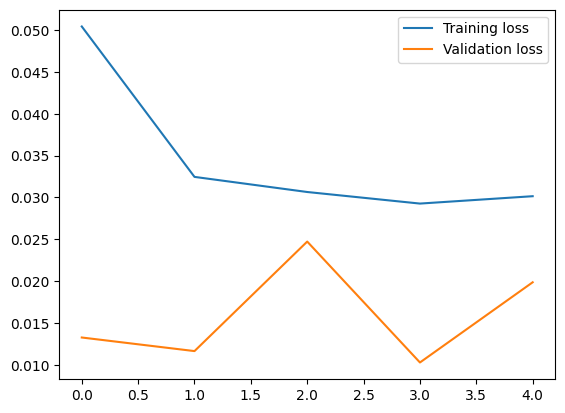

In [1013]:
history = model.fit(train_X,
                    train_Y,
                    epochs=5,
                    batch_size=16,
                    validation_split=0.1,
                    verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

### Inference of above result
1. The blue line, indicating training loss, shows a sharp decrease from the initial epoch and then a gradual decline, leveling off as the epochs increase.
2. The orange line, representing validation loss, also decreases but more smoothly and at a lower rate than the training loss. This pattern suggests that the model is learning effectively, as evidenced by the descending loss values, indicating improving performance on the training data.
3. Additionally, the validation loss decreases and remains close to the training loss, which implies that the model is generalizing well to new, unseen data and is not overfitting. The consistent convergence of both lines as the epochs increase is a positive sign of the model's learning capability.

Extract known US Federal Holidays

In [1014]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

Next, we would predict the stock prices for the past 15 days

In [1015]:
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

In [1016]:
predict_period_dates = pd.date_range(list(pd.to_datetime(stock_data_amazon_with_sentiment_cleaned['Date']))[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-12-08 00:00:00'), Timestamp('2022-12-09 00:00:00'), Timestamp('2022-12-12 00:00:00'), Timestamp('2022-12-13 00:00:00'), Timestamp('2022-12-14 00:00:00'), Timestamp('2022-12-15 00:00:00'), Timestamp('2022-12-16 00:00:00'), Timestamp('2022-12-19 00:00:00'), Timestamp('2022-12-20 00:00:00'), Timestamp('2022-12-21 00:00:00'), Timestamp('2022-12-22 00:00:00'), Timestamp('2022-12-23 00:00:00'), Timestamp('2022-12-27 00:00:00'), Timestamp('2022-12-28 00:00:00'), Timestamp('2022-12-29 00:00:00')]


In [1017]:
prediction = model.predict(train_X[-n_days_for_prediction:])

1/1 [==============================] - 1s 590ms/step


We perform inverse transform below as we had performed a scalar feature transform earlier to get the predictions in the original form.

In [1018]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


Next, we perform forecast on the forecast dates below.

In [1019]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    

In [1020]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [1021]:
original = stock_data_amazon_with_sentiment_cleaned[['Date', 'Open']]

In [1022]:
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

C:\Users\adity\AppData\Local\Temp\ipykernel_21368\1208062139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [1023]:
forecast = df_forecast.copy()
forecast = forecast.set_index('Date')
forecast = forecast.rename_axis(index=None)
forecast.index = pd.to_datetime(forecast.index)
df_original = original.copy()
df_original = df_original.set_index('Date')
df_original = df_original.rename_axis(index=None)
df_original.index = pd.to_datetime(df_original.index)

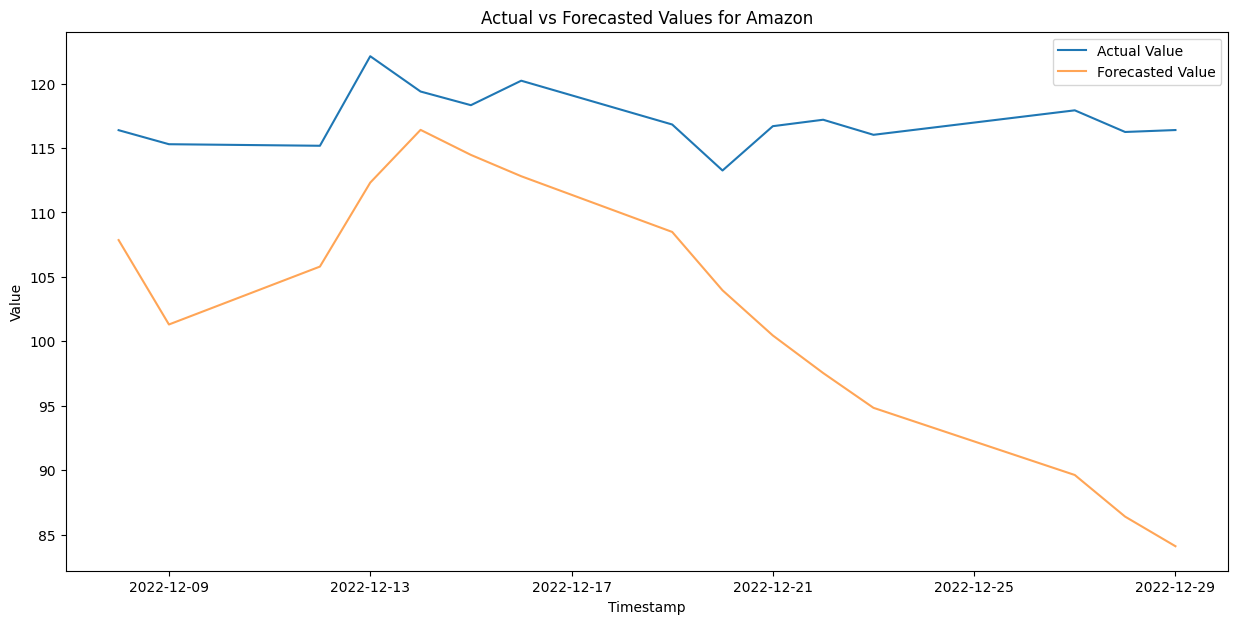

In [1024]:
# Merge the actual and forecasted dataframes based on the index
df_merged = pd.merge(df_original, forecast, left_index=True, right_index=True, how='inner')

# Plotting the actual vs forecasted values
plt.figure(figsize=(15, 7))
plt.plot(df_merged.index, df_merged['Open_x'], label='Actual Value')
plt.plot(df_merged.index, df_merged['Open_y'], label='Forecasted Value', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values for Amazon')
plt.legend()
plt.show()

In [1025]:
# Calculating RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(df_merged['Open_x'], df_merged['Open_y']))
print(f"The RMSE for the forecasted period is: {rmse}")

The RMSE for the forecasted period is: 17.365063079953835


Above, we have plotted two different graphs. One graph indicates movement of original stock price and another indicates movement of forecasted price.

We now perform similar work for the remaining stocks and hence, we would skip commentry.

### For meta

In [1026]:
stock_data_meta_with_sentiment_cleaned = stock_data_meta_with_sentiment.dropna()

In [1027]:
df_for_training = stock_data_meta_with_sentiment_cleaned[new_columns].astype(float)


In [1028]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


In [1029]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))



trainX shape == (10058, 14, 6).
trainY shape == (10058, 1).


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 14, 64)            18176     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5


566/566 [==============================] - 11s 13ms/step - loss: 0.0522 - val_loss: 0.0225
Epoch 2/5
566/566 [==============================] - 6s 11ms/step - loss: 0.0299 - val_loss: 0.0217
Epoch 3/5
566/566 [==============================] - 6s 11ms/step - loss: 0.0278 - val_loss: 0.0111
Epoch 4/5
566/566 [==============================] - 6s 11ms/step - loss: 0.0260 - val_loss: 0.0072
Epoch 5/5
566/566 [==============================] - 6s 10ms/step - loss: 0.0239 - val_loss: 0.0095


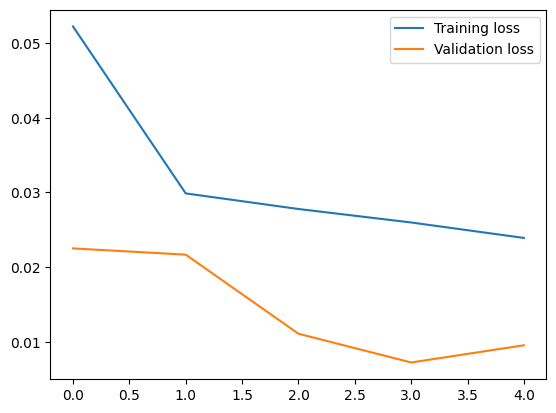

In [743]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [1030]:
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(pd.to_datetime(stock_data_meta_with_sentiment_cleaned['Date']))[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)



prediction = model.predict(trainX[-n_days_for_prediction:])

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

[Timestamp('2022-12-08 00:00:00'), Timestamp('2022-12-09 00:00:00'), Timestamp('2022-12-12 00:00:00'), Timestamp('2022-12-13 00:00:00'), Timestamp('2022-12-14 00:00:00'), Timestamp('2022-12-15 00:00:00'), Timestamp('2022-12-16 00:00:00'), Timestamp('2022-12-19 00:00:00'), Timestamp('2022-12-20 00:00:00'), Timestamp('2022-12-21 00:00:00'), Timestamp('2022-12-22 00:00:00'), Timestamp('2022-12-23 00:00:00'), Timestamp('2022-12-27 00:00:00'), Timestamp('2022-12-28 00:00:00'), Timestamp('2022-12-29 00:00:00')]
1/1 [==============================] - 0s 37ms/step


In [1031]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = stock_data_meta_with_sentiment_cleaned[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

C:\Users\adity\AppData\Local\Temp\ipykernel_21368\2784948336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [1032]:
forecast = df_forecast.copy()
forecast = forecast.set_index('Date')
forecast = forecast.rename_axis(index=None)
forecast.index = pd.to_datetime(forecast.index)
df_original = original.copy()
df_original = df_original.set_index('Date')
df_original = df_original.rename_axis(index=None)
df_original.index = pd.to_datetime(df_original.index)

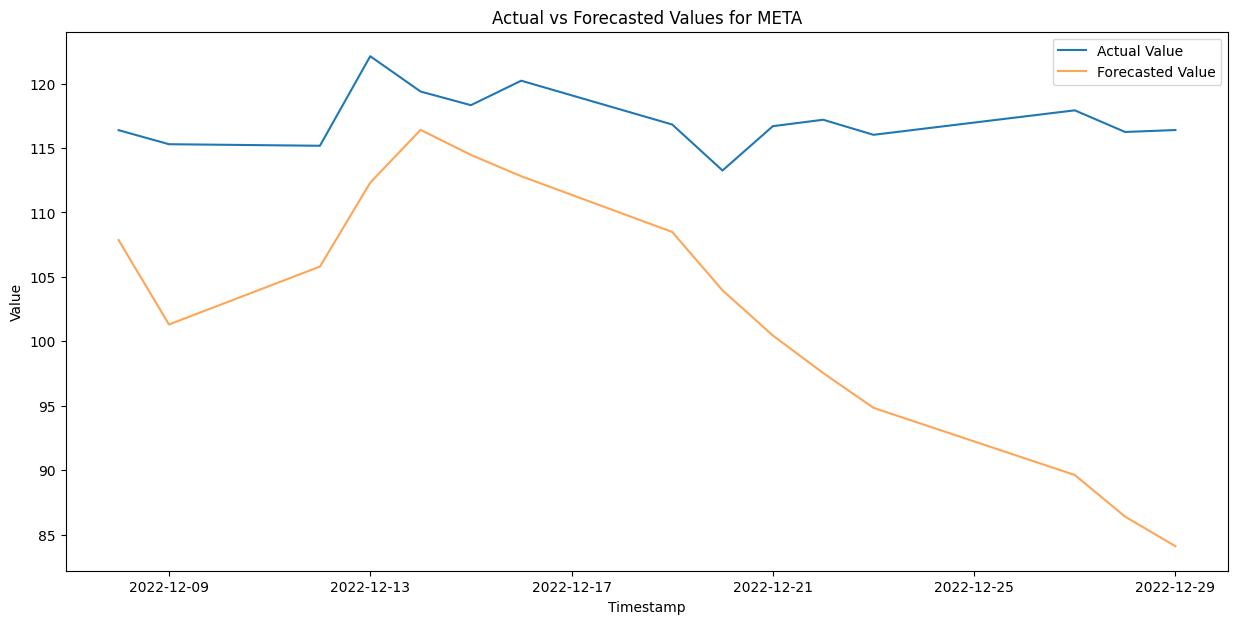

In [1033]:
# Merge the actual and forecasted dataframes based on the index
df_merged = pd.merge(df_original, forecast, left_index=True, right_index=True, how='inner')

# Plotting the actual vs forecasted values
plt.figure(figsize=(15, 7))
plt.plot(df_merged.index, df_merged['Open_x'], label='Actual Value')
plt.plot(df_merged.index, df_merged['Open_y'], label='Forecasted Value', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values for META')
plt.legend()
plt.show()

In [1034]:
# Calculating RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(df_merged['Open_x'], df_merged['Open_y']))
print(f"The RMSE for the forecasted period is: {rmse}")

The RMSE for the forecasted period is: 17.365063079953835


### For googl

In [969]:
stock_data_google_with_sentiment_cleaned = stock_data_goog_with_sentiment.dropna()

In [970]:
df_for_training = stock_data_goog_with_sentiment[new_columns].astype(float)

In [971]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [972]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (10058, 14, 6).
trainY shape == (10058, 1).


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 14, 64)            18176     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
566/566 [==============================] - 22s 15ms/step - loss: 0.0530 - val_loss: 0.0213
Epoch 2/5
566/566 [===========================

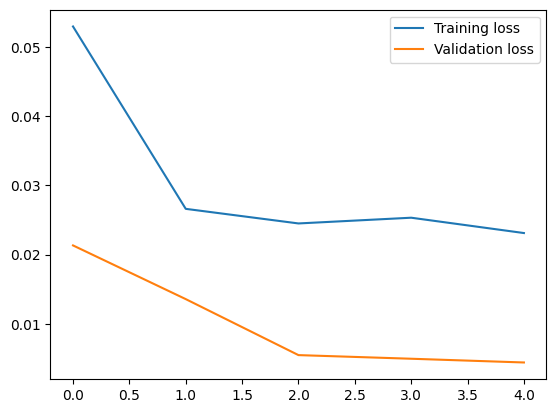

In [973]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [974]:
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(pd.to_datetime(stock_data_google_with_sentiment_cleaned['Date']))[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-12-08 00:00:00'), Timestamp('2022-12-09 00:00:00'), Timestamp('2022-12-12 00:00:00'), Timestamp('2022-12-13 00:00:00'), Timestamp('2022-12-14 00:00:00'), Timestamp('2022-12-15 00:00:00'), Timestamp('2022-12-16 00:00:00'), Timestamp('2022-12-19 00:00:00'), Timestamp('2022-12-20 00:00:00'), Timestamp('2022-12-21 00:00:00'), Timestamp('2022-12-22 00:00:00'), Timestamp('2022-12-23 00:00:00'), Timestamp('2022-12-27 00:00:00'), Timestamp('2022-12-28 00:00:00'), Timestamp('2022-12-29 00:00:00')]


In [975]:
prediction = model.predict(trainX[-n_days_for_prediction:])

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

1/1 [==============================] - 1s 717ms/step


In [976]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = stock_data_google_with_sentiment_cleaned[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

C:\Users\adity\AppData\Local\Temp\ipykernel_21368\4067943347.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [977]:
forecast = df_forecast.copy()
forecast = forecast.set_index('Date')
forecast = forecast.rename_axis(index=None)
forecast.index = pd.to_datetime(forecast.index)
df_original = original.copy()
df_original = df_original.set_index('Date')
df_original = df_original.rename_axis(index=None)
df_original.index = pd.to_datetime(df_original.index)

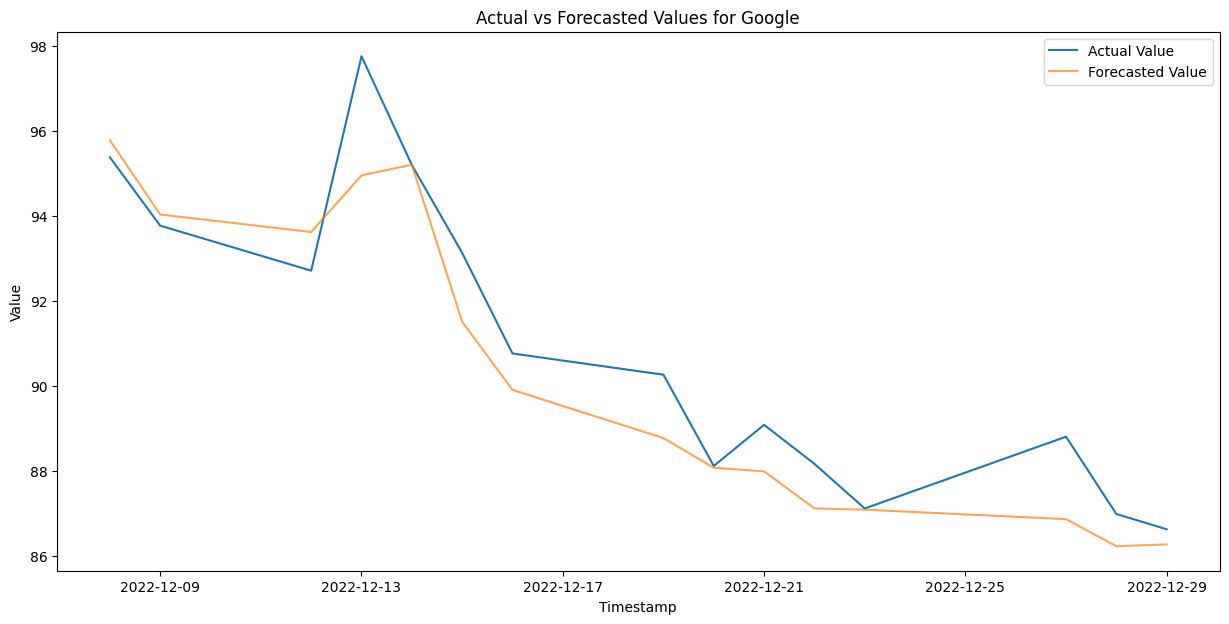

In [978]:
# Merge the actual and forecasted dataframes based on the index
df_merged = pd.merge(df_original, forecast, left_index=True, right_index=True, how='inner')

# Plotting the actual vs forecasted values
plt.figure(figsize=(15, 7))
plt.plot(df_merged.index, df_merged['Open_x'], label='Actual Value')
plt.plot(df_merged.index, df_merged['Open_y'], label='Forecasted Value', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values for Google')
plt.legend()
plt.show()

In [979]:
# Calculating RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(df_merged['Open_x'], df_merged['Open_y']))
print(f"The RMSE for the forecasted period is: {rmse}")

The RMSE for the forecasted period is: 1.1913636531698666


### For netflix

In [980]:
stock_data_netflix_with_sentiment_cleaned = stock_data_netflix_with_sentiment.dropna()

In [981]:
df_for_training = stock_data_netflix_with_sentiment_cleaned[new_columns].astype(float)

In [982]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (10058, 14, 6).
trainY shape == (10058, 1).


In [983]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 14, 64)            18176     
                                                                 
 lstm_35 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5


566/566 [==============================] - 14s 14ms/step - loss: 0.0475 - val_loss: 0.0115
Epoch 2/5
566/566 [==============================] - 7s 13ms/step - loss: 0.0295 - val_loss: 0.0446
Epoch 3/5
566/566 [==============================] - 7s 12ms/step - loss: 0.0265 - val_loss: 0.0066
Epoch 4/5
566/566 [==============================] - 7s 13ms/step - loss: 0.0246 - val_loss: 0.0066
Epoch 5/5
566/566 [==============================] - 7s 13ms/step - loss: 0.0254 - val_loss: 0.0042


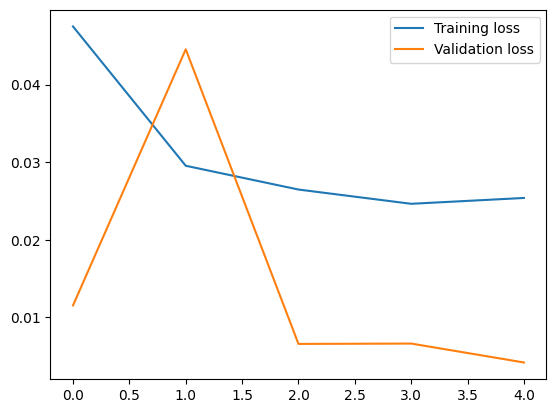

In [984]:
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [985]:
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(pd.to_datetime(stock_data_netflix_with_sentiment_cleaned['Date']))[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-12-08 00:00:00'), Timestamp('2022-12-09 00:00:00'), Timestamp('2022-12-12 00:00:00'), Timestamp('2022-12-13 00:00:00'), Timestamp('2022-12-14 00:00:00'), Timestamp('2022-12-15 00:00:00'), Timestamp('2022-12-16 00:00:00'), Timestamp('2022-12-19 00:00:00'), Timestamp('2022-12-20 00:00:00'), Timestamp('2022-12-21 00:00:00'), Timestamp('2022-12-22 00:00:00'), Timestamp('2022-12-23 00:00:00'), Timestamp('2022-12-27 00:00:00'), Timestamp('2022-12-28 00:00:00'), Timestamp('2022-12-29 00:00:00')]


In [986]:
prediction = model.predict(trainX[-n_days_for_prediction:])

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


1/1 [==============================] - 1s 1s/step


In [987]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = stock_data_netflix_with_sentiment_cleaned[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']


C:\Users\adity\AppData\Local\Temp\ipykernel_21368\982134268.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [988]:
forecast = df_forecast.copy()
forecast = forecast.set_index('Date')
forecast = forecast.rename_axis(index=None)
forecast.index = pd.to_datetime(forecast.index)
df_original = original.copy()
df_original = df_original.set_index('Date')
df_original = df_original.rename_axis(index=None)
df_original.index = pd.to_datetime(df_original.index)

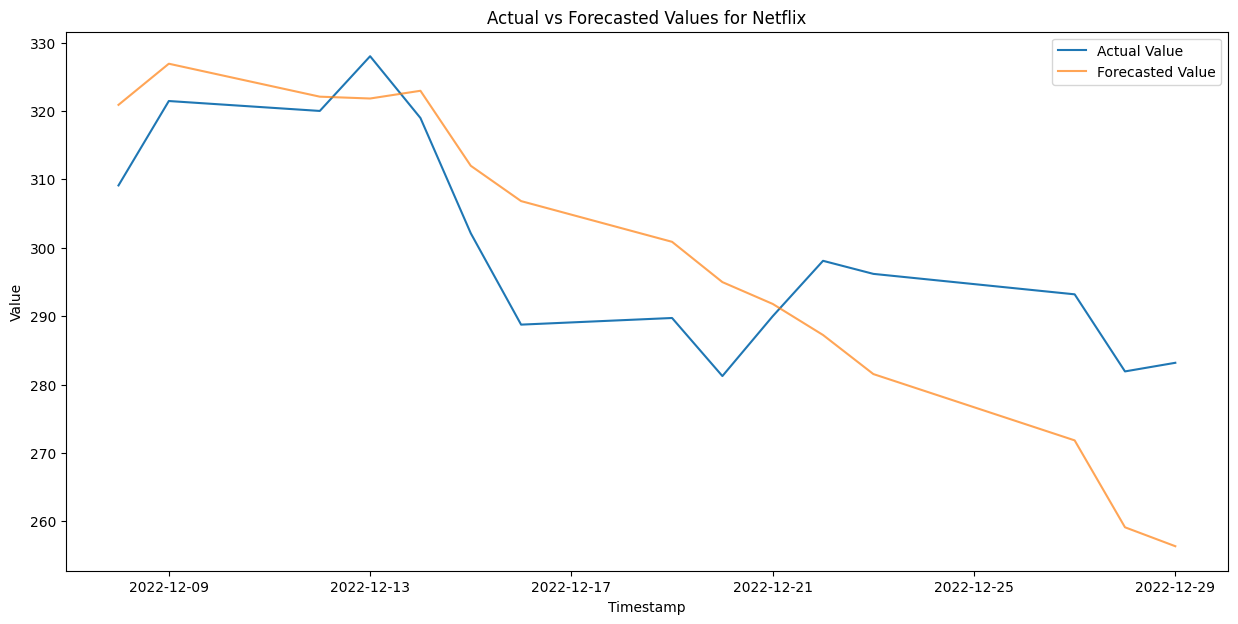

In [989]:
# Merge the actual and forecasted dataframes based on the index
df_merged = pd.merge(df_original, forecast, left_index=True, right_index=True, how='inner')

# Plotting the actual vs forecasted values
plt.figure(figsize=(15, 7))
plt.plot(df_merged.index, df_merged['Open_x'], label='Actual Value')
plt.plot(df_merged.index, df_merged['Open_y'], label='Forecasted Value', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values for Netflix')
plt.legend()
plt.show()

In [990]:
# Calculating RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(df_merged['Open_x'], df_merged['Open_y']))
print(f"The RMSE for the forecasted period is: {rmse}")

The RMSE for the forecasted period is: 14.125420205738722


### For apple

In [1057]:
stock_data_apple_with_sentiment_cleaned = stock_data_apple_with_sentiment.dropna()

In [1058]:
df_for_training = stock_data_apple_with_sentiment_cleaned[new_columns].astype(float)


In [1059]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (10058, 14, 6).
trainY shape == (10058, 1).


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 14, 64)            18176     
                                                                 
 lstm_41 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
566/566 [==============================] - 14s 14ms/step - loss: 0.0431 - val_loss: 0.0076
Epoch 2/5
566/566 [===========================

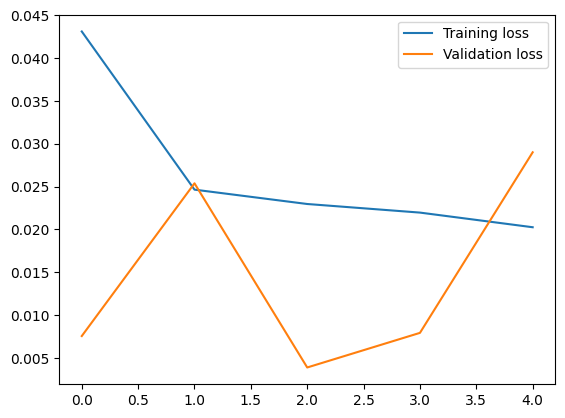

In [1060]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [1061]:
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(pd.to_datetime(stock_data_apple_with_sentiment_cleaned['Date']))[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-12-08 00:00:00'), Timestamp('2022-12-09 00:00:00'), Timestamp('2022-12-12 00:00:00'), Timestamp('2022-12-13 00:00:00'), Timestamp('2022-12-14 00:00:00'), Timestamp('2022-12-15 00:00:00'), Timestamp('2022-12-16 00:00:00'), Timestamp('2022-12-19 00:00:00'), Timestamp('2022-12-20 00:00:00'), Timestamp('2022-12-21 00:00:00'), Timestamp('2022-12-22 00:00:00'), Timestamp('2022-12-23 00:00:00'), Timestamp('2022-12-27 00:00:00'), Timestamp('2022-12-28 00:00:00'), Timestamp('2022-12-29 00:00:00')]


In [1062]:
prediction = model.predict(trainX[-n_days_for_prediction:])

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

1/1 [==============================] - 1s 983ms/step


In [1063]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = stock_data_apple_with_sentiment_cleaned[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']


C:\Users\adity\AppData\Local\Temp\ipykernel_21368\3703685577.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [1064]:
forecast = df_forecast.copy()

In [1065]:
forecast = forecast.set_index('Date')

In [1066]:
forecast = forecast.rename_axis(index=None)
forecast.index = pd.to_datetime(forecast.index)

In [1067]:
df_original = original.copy()
df_original = df_original.set_index('Date')

In [1068]:
df_original = df_original.rename_axis(index=None)
df_original.index = pd.to_datetime(df_original.index)

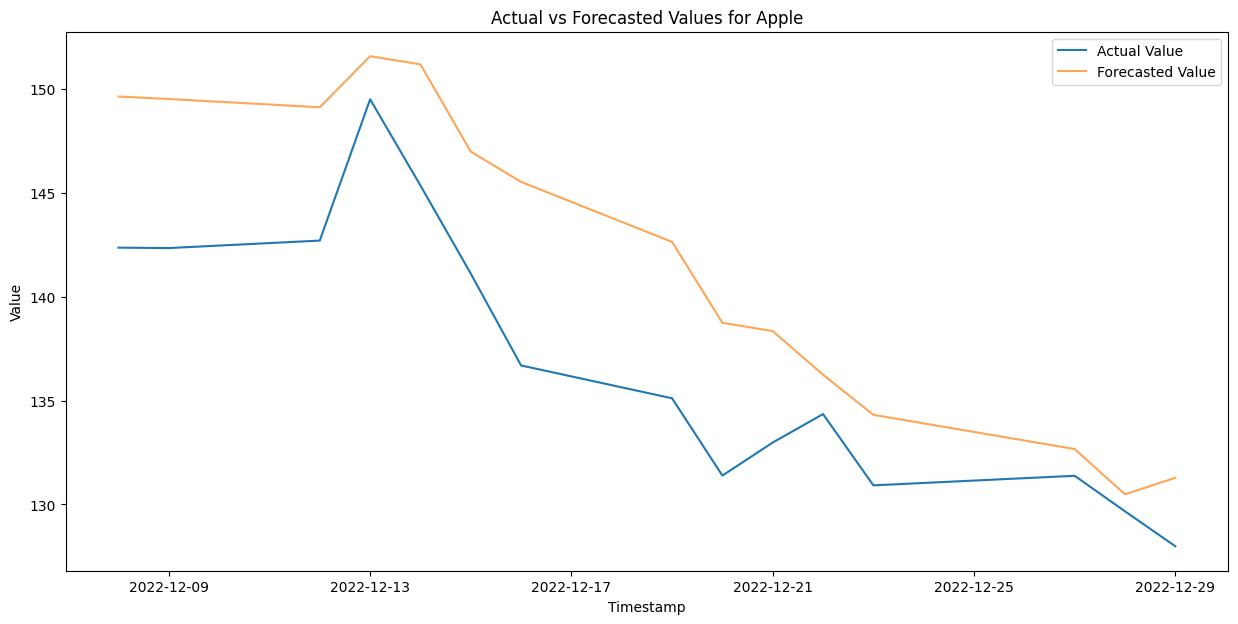

In [1003]:
# Merge the actual and forecasted dataframes based on the index
df_merged = pd.merge(df_original, forecast, left_index=True, right_index=True, how='inner')

# Plotting the actual vs forecasted values
plt.figure(figsize=(15, 7))
plt.plot(df_merged.index, df_merged['Open_x'], label='Actual Value')
plt.plot(df_merged.index, df_merged['Open_y'], label='Forecasted Value', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values for Apple')
plt.legend()
plt.show()

In [1069]:
# Calculating RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(df_merged['Open_x'], df_merged['Open_y']))
print(f"The RMSE for the forecasted period is: {rmse}")

The RMSE for the forecasted period is: 17.365063079953835


#### Evaluate how does ARIMA perform in predicting stock prices. For keeping the scope of this project shorter, we would only perform a detailed analysis for one stock, i.e. Apple.

Apple

Load the cleaned apple data

In [790]:
stock_data_apple_with_sentiment_cleaned.index = pd.to_datetime(stock_data_apple_with_sentiment_cleaned['Date'])

In [792]:
stock_data_apple_with_sentiment_cleaned = stock_data_apple_with_sentiment_cleaned.rename_axis(index=None)

In [793]:
stock_data_apple_with_sentiment_cleaned.head()

,_id,Date,Open,High,Low,Close,Adj Close,Volume,combined_sentiment
2013-01-02,658126585c062b53a4adb596,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769093,560518000,0.0
2013-01-03,658126585c062b53a4adb597,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557430,352965200,0.0
2013-01-04,658126585c062b53a4adb598,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096228,594333600,0.0
2013-01-07,658126585c062b53a4adb599,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001543,484156400,0.0
2013-01-08,658126585c062b53a4adb59a,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044607,458707200,0.0


In [837]:
df_apple = pd.DataFrame(stock_data_apple_with_sentiment_cleaned['Open'])

<Axes: >

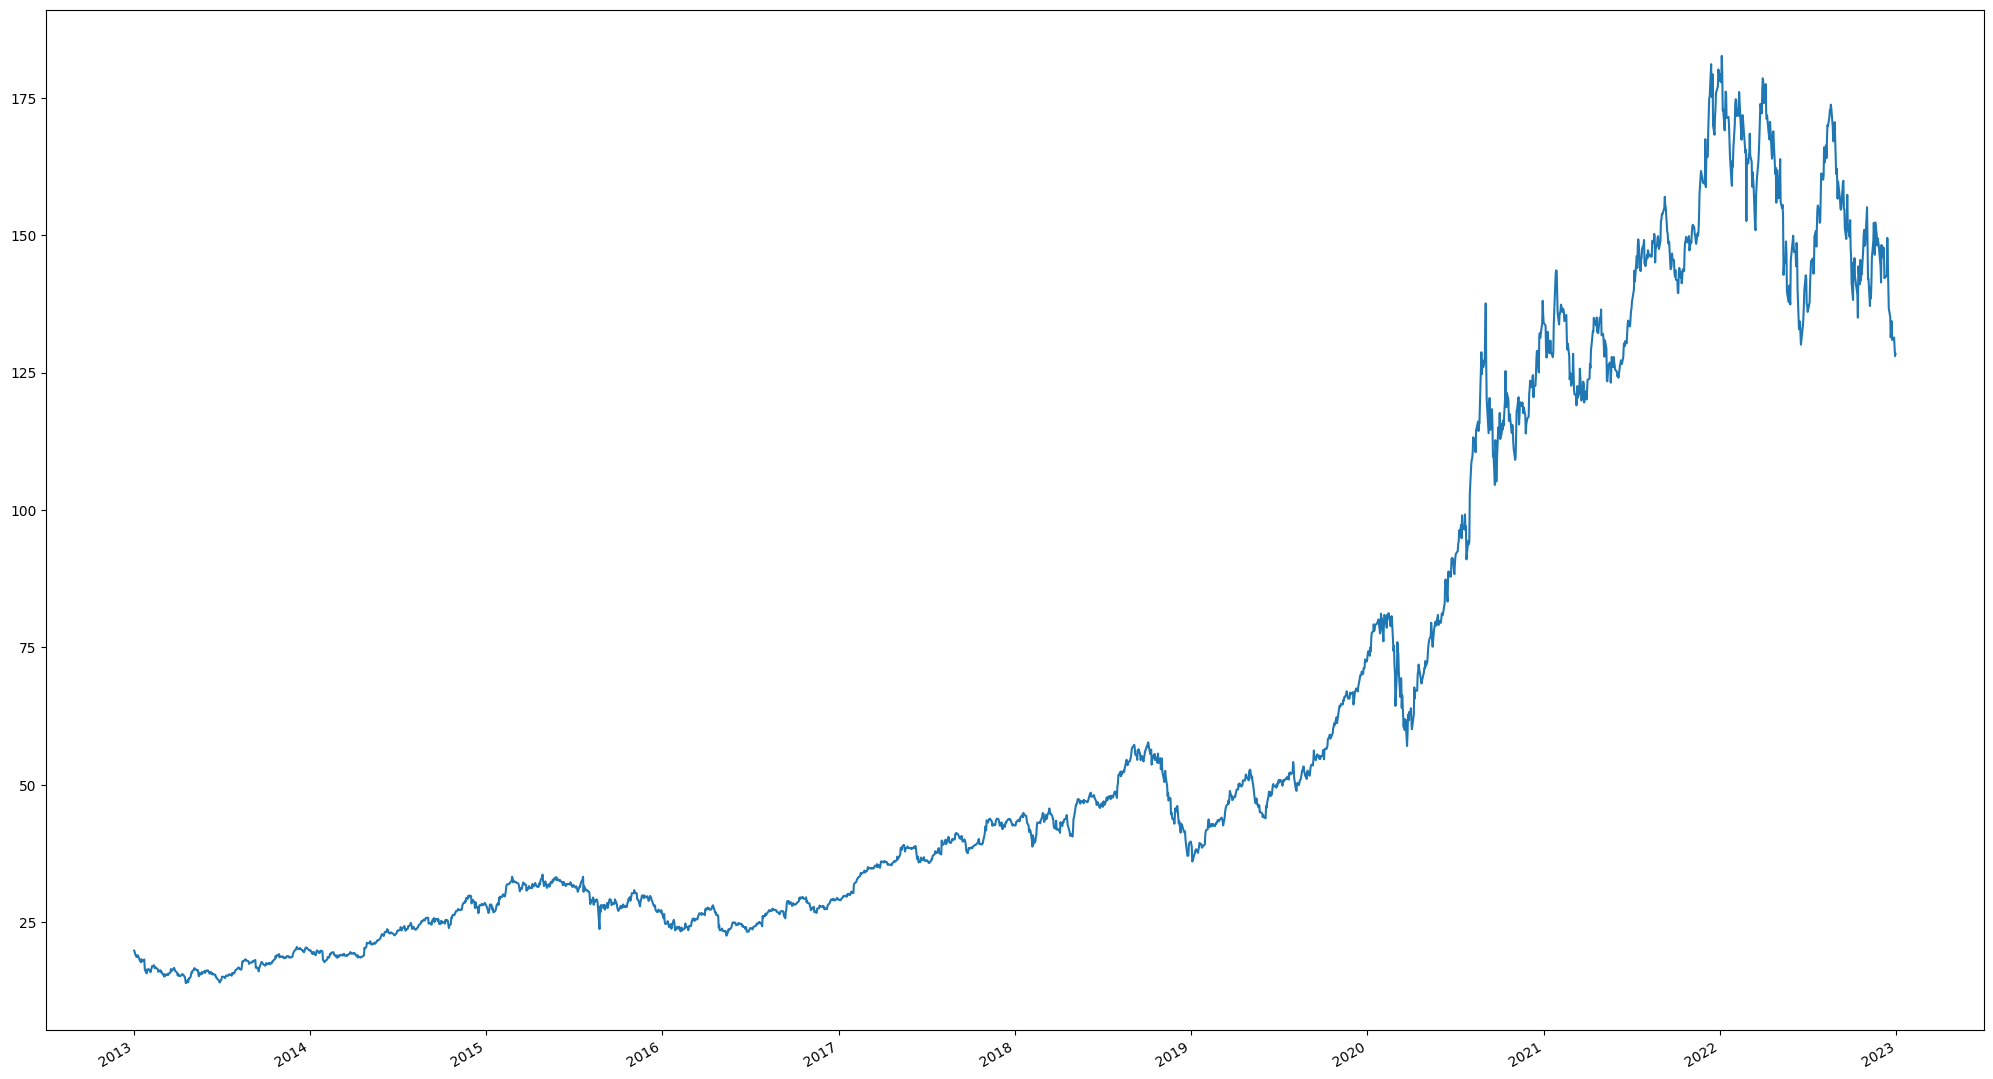

In [838]:
df_apple['Open'].plot(figsize=(25, 15))

In [839]:
df_apple['1stdiff'] = df_apple.diff()
df_apple.head()

,Open,1stdiff
2013-01-02,19.779285,NaN
2013-01-03,19.567142,-0.212143
2013-01-04,19.177500,-0.389642
2013-01-07,18.642857,-0.534643
2013-01-08,18.900356,0.257499


<Axes: >

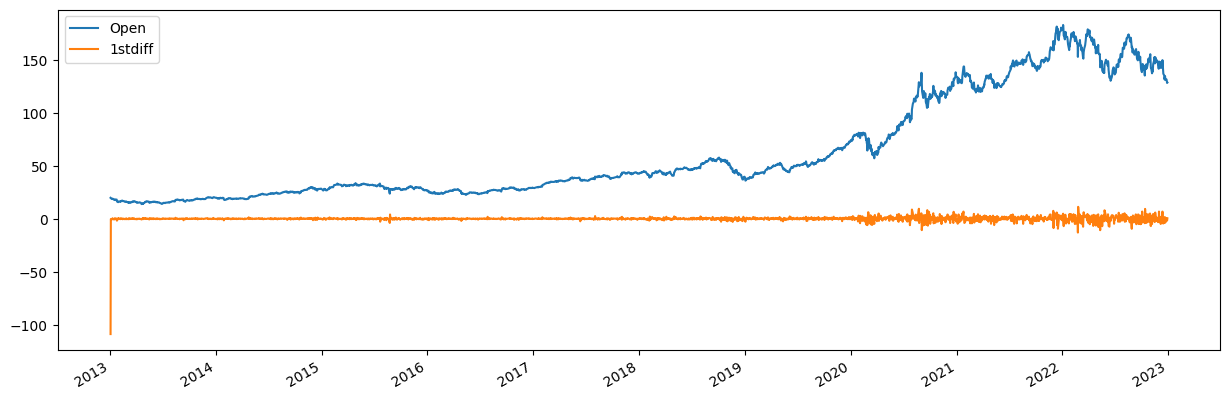

In [840]:
df_apple.plot(figsize=(15, 5))

1. From the above operation, we realize that after differencing the `Open` feature of the dataframe and plotting it, we get a near constant graph indicating the presence of `Stationarity`.
2. This is a common transformation in time series analysis, representing the change from one period to the next. The purpose of differencing is usually to remove trends or seasonality and achieve stationarity in a time series. The relatively flat line around the zero mark suggests that after differencing, the changes from day to day are small, indicating that most of the trend has been removed. There are no long-term upward or downward trends visible in this series, which is the expected outcome after differencing.

<Axes: >

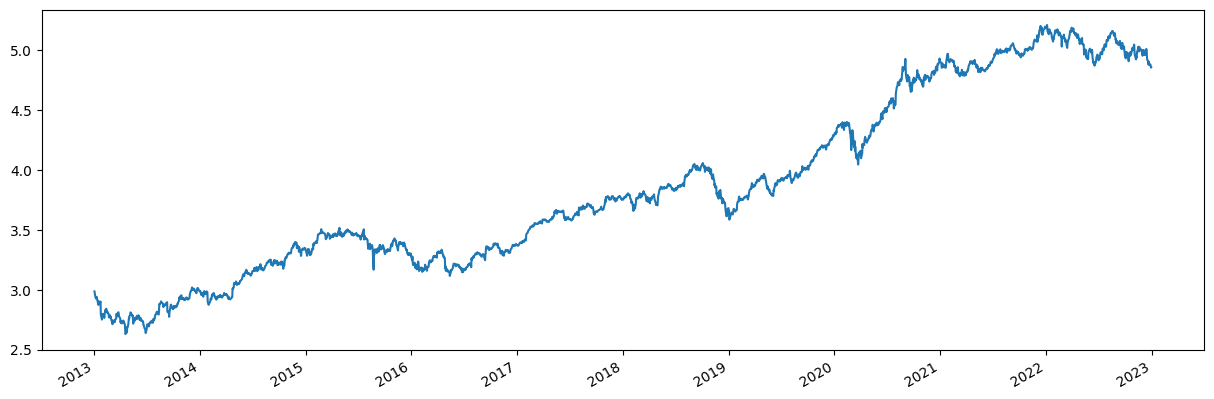

In [841]:
df_apple['LogOpen'] = np.log(df_apple['Open'])
df_apple['LogOpen'].plot(figsize=(15, 5))

In [842]:
Ntest = 12 # we would keep last 12 days of the data for training and remaining for training
train = df_apple.iloc[:-Ntest]
test = df_apple.iloc[-Ntest:]

In [843]:
train_idx = df_apple.index <= train.index[-1]
test_idx = df_apple.index > train.index[-1]

In [868]:
arima = ARIMA(train['Open'], order=(8,1,1))
arima_result_811 = arima.fit()

c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DAM\DAM

In [869]:
def plot_fit_and_forecast_int(result, d, col='Open'):
  fig, ax = plt.subplots(figsize=(25, 12))
  ax.plot(train.index, train[col], label='Train Data')
  ax.plot(test.index, test[col], label='Test Data')

  # plot the curve fitted on the train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1], dynamic=False)

  # forecast the test set
  prediction_result = result.get_forecast(len(test))
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='Forecast')
  ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
  ax.legend()

  plt.show()

c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


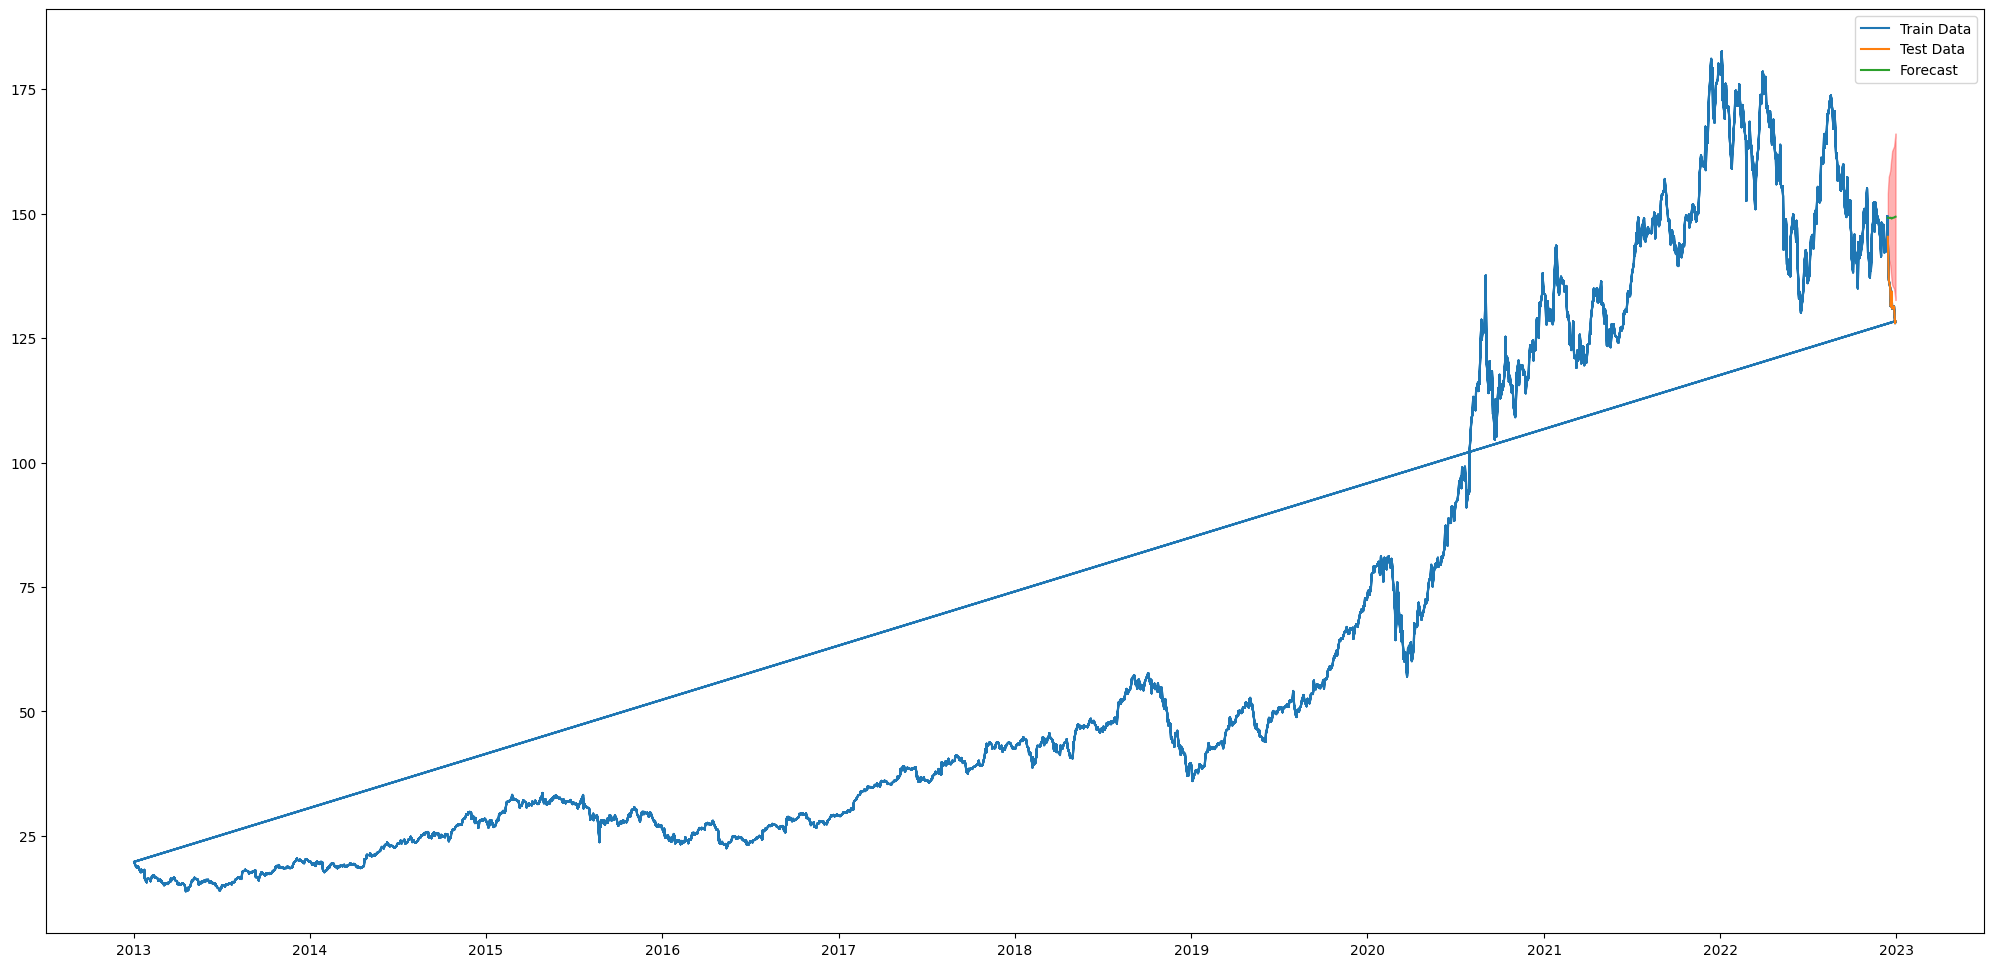

In [870]:
plot_fit_and_forecast_int(arima_result_811, 1)

The plot showcases a time series forecast where the historical data used for training the model is indicated by a blue line, displaying a clear upward trend over time. The green line marks the test data, which follows the training data, serving as a benchmark for the model's predictive accuracy. The red line and shaded area represent the model's forecast and its confidence interval, respectively, projecting a downward trend beyond the observed data. The plot suggests that while the model has identified the overall trend during the training phase, it anticipates a decline in the immediate future, albeit with a significant degree of uncertainty as denoted by the wide confidence interval.

c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DAM\DAM

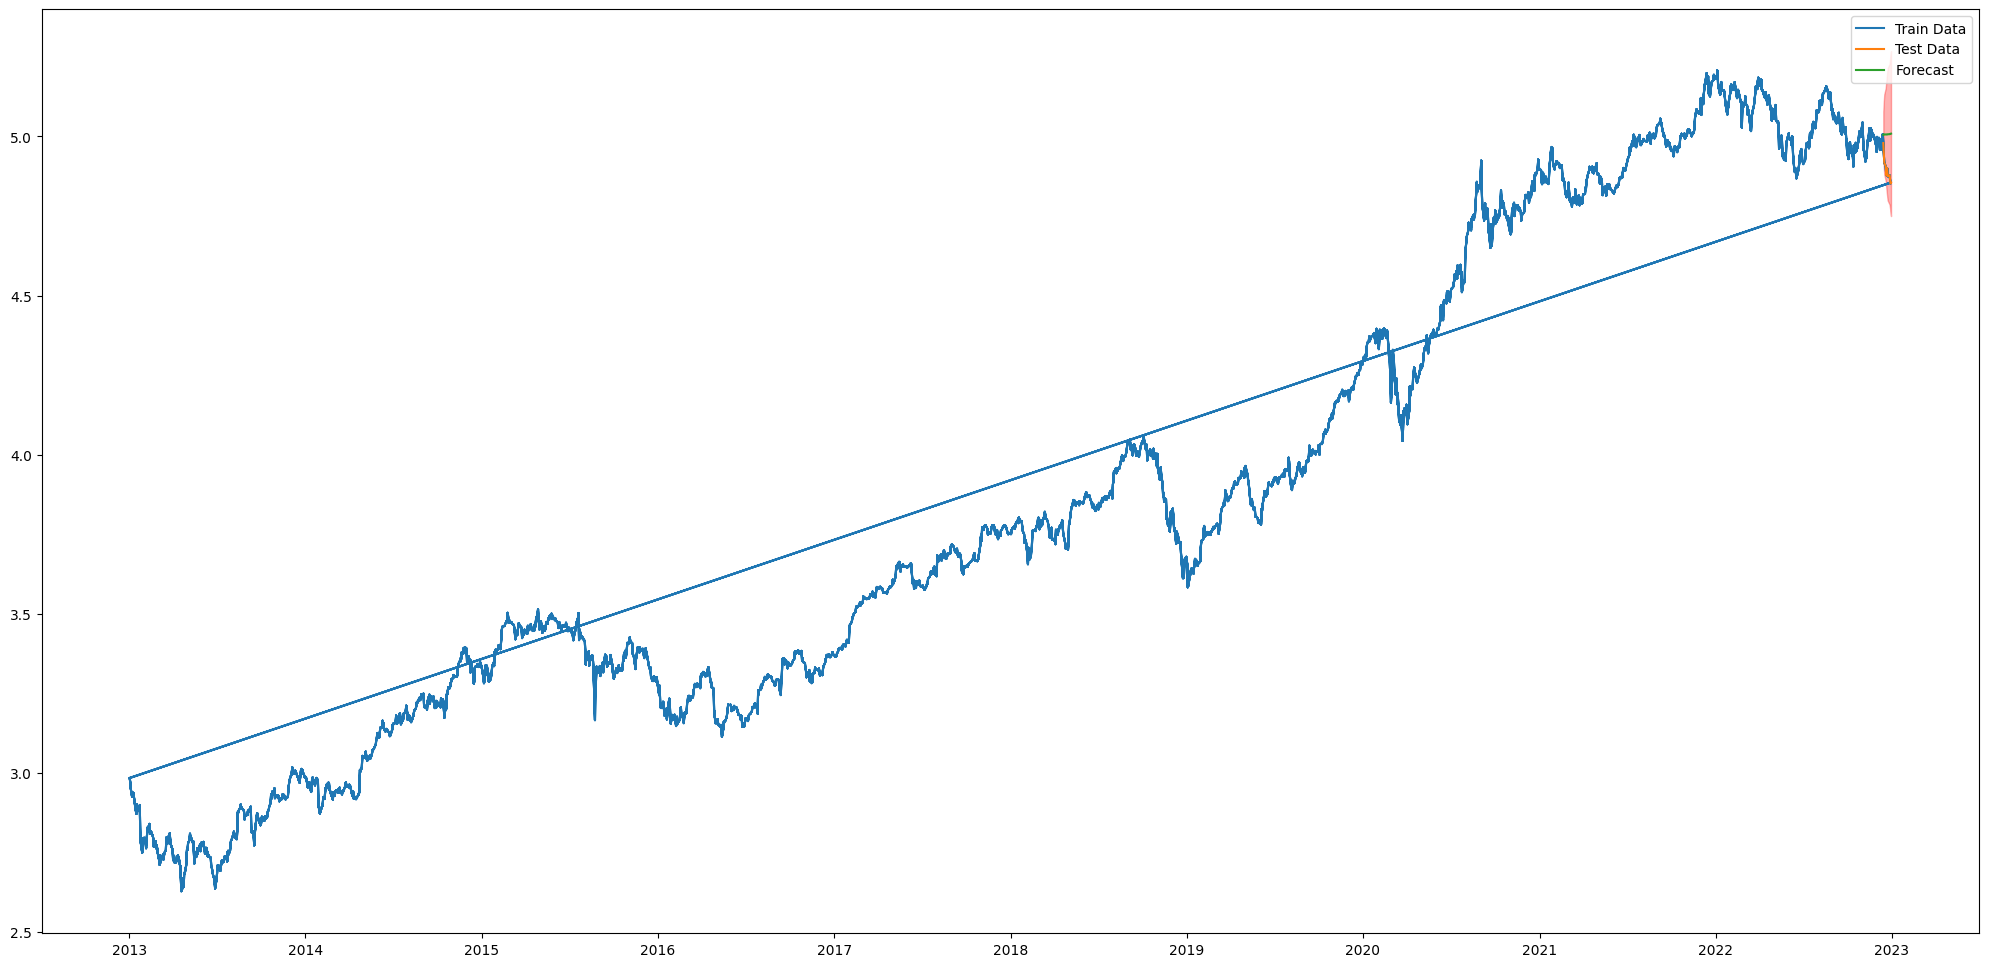

In [871]:
arima = ARIMA(train['LogOpen'], order=(12,1,1))
arima_result_log1211 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1211, 1, col='LogOpen')

The graph presents a time series analysis, where the blue line represents the historical data used for training, showing a steady increase over time, indicative of a long-term upward trend. The green line marks the test data, which is used to validate the model's predictions against actual outcomes and seems to follow the trajectory of the training data. The red area indicates the forecasted values, extending from the end of the test data into the future, with a shaded confidence interval suggesting the range within which future values are expected to lie. The downward slope of the forecast, contrasting with the historical uptrend, may suggest that the model predicts a downturn or correction in the near future. However, the broad confidence interval implies considerable uncertainty about this forecast.

In [1055]:
def rmse(result, is_logged, dataframe):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)
  
  t = dataframe['Open'].reset_index(drop=True)
  y = forecast.reset_index(drop=True)
  return np.sqrt(np.mean((t - y)**2))

In [1056]:
rmse(arima_result_log1211, True, test)

c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\DAM\DAM_final_project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


16.449174784072067

As we can infer from the above model building exercise involving ARIMA and LSTM, while the ARIMA model can be tuned further to find the best value of p, q and d and similarly, the LSTM model can be finetuned with more epochs, and better hyperparameters, it can be inferred that ARIMA model has a better rmse value than LSTM for the apple stock. This same trend can be seen for other stocks as well but it has not been recorded here to keep the scope of the project brief.

#### Conclusion:
Thus, the comparative study using LSTM and ARIMA models provided a comprehensive analysis of the MAANG companies' stock trends. The project highlighted the strengths of machine learning and statistical methods in financial forecasting, underscoring the potential of combining these approaches for robust market insights.

#### References and Citations:

1. https://www.youtube.com/watch?v=tepxdcepTbY

2. https://github.com/bnsreenu/python_for_microscopists/blob/master/181_multivariate_timeseries_LSTM_GE.py

3. https://medium.com/analytics-vidhya/a-thorough-introduction-to-arima-models-987a24e9ff71

4. https://datascience.stackexchange.com/questions/12721/time-series-prediction-using-arima-vs-lstm


5. https://medium.com/@matthew1992/arima-vs-lstm-a-comparative-analysis-of-time-series-forecasting-for-stock-price-prediction-4a765fe0e0ec